# Problem understanding

## Problem Statement

To build a supervised, linear regression predictive model using data that provide the
optimum insurance cost for an individual

We will be using the health and habit related parameters for
the estimated cost of insuranc.

By accurately estimating insurance costs, the model aims to provide fair premiums to customers while minimizing the risk for insurance companies.

Data File: Data.csv

Target: insurance_cost (Total insurance cost).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pylab
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor, plot_importance


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data loading and description

In [2]:
df = pd.read_csv('Data.csv')
df.head()

applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0             4866   28                   1  ...          Unknown   
1             6411   50                   0  ...  formerly smoked   
2             4509   68                   0  ...  formerly smoked   
3             6214   51                   0  ...          Unknown   
4             4938   44                   0  ...     never smoked   

  Year_last_admitted   Location  weight covered_by_any_other_company  Alcohol  \
0                NaN    Chennai      67                            N     Rare   
1                NaN     Jaipur      58                            N     Rare   
2                NaN     Jaipur      73                            N    Daily   
3                NaN    Chennai      71                            Y     Rare   
4             2004.0  Bangalore      74                            N       No   

   exercise  weight_change_in_last_one_year fat_percentage insurance_cost  
0  Moderate                               1             25          20978  
1  Moderate                               3             27           6170  
2   Extreme                               0             32          28382  
3        No                               3             37          27148  
4   Extreme                               0             34          29616  

[5 rows x 24 columns]

In [3]:
df.shape

(25000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [5]:
df['applicant_id'].nunique()

25000

In [6]:
def check_value_counts_object(df):
  """
  This function checks the value_counts() for all object columns in a pandas DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame to analyze.

  Returns:
      None
  """
  for col in df.select_dtypes(include=['object']):
    print(f"Value counts for column {col}:")
    print(df[col].value_counts())
    print()

In [7]:
check_value_counts_object(df)

Value counts for column Occupation:
Occupation
Student     10169
Business    10020
Salried      4811
Name: count, dtype: int64

Value counts for column cholesterol_level:
cholesterol_level
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: count, dtype: int64

Value counts for column Gender:
Gender
Male      16422
Female     8578
Name: count, dtype: int64

Value counts for column smoking_status:
smoking_status
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: count, dtype: int64

Value counts for column Location:
Location
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: count, dtype: int64

Value counts for column covered_by_any_othe

In [8]:
print('Percentage of precense of "Unknown" values in the column Smoking status:' ,(len(df.loc[df['smoking_status'] == 'Unknown'])/ len(df))*100)

Percentage of precense of "Unknown" values in the column Smoking status: 30.220000000000002


In [9]:
df = df.drop('applicant_id', axis=1)

In [10]:
df.columns

Index(['years_of_insurance_with_us', 'regular_checkup_lasy_year',
       'adventure_sports', 'Occupation', 'visited_doctor_last_1_year',
       'cholesterol_level', 'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'Gender', 'avg_glucose_level', 'bmi',
       'smoking_status', 'Year_last_admitted', 'Location', 'weight',
       'covered_by_any_other_company', 'Alcohol', 'exercise',
       'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost'],
      dtype='object')

In [11]:
# Statistical summary of continuous variables

df_cont = df[['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'fat_percentage', 'insurance_cost']]
df_cont.describe().T

count          mean           std     min      25%  \
daily_avg_steps    25000.0   5215.889320   1053.179748  2034.0   4543.0   
age                25000.0     44.918320     16.107492    16.0     31.0   
avg_glucose_level  25000.0    167.530000     62.729712    57.0    113.0   
bmi                24010.0     31.393328      7.876535    12.3     26.1   
weight             25000.0     71.610480      9.325183    52.0     64.0   
fat_percentage     25000.0     28.812280      8.632382    11.0     21.0   
insurance_cost     25000.0  27147.407680  14323.691832  2468.0  16042.0   

                       50%      75%      max  
daily_avg_steps     5089.0   5730.0  11255.0  
age                   45.0     59.0     74.0  
avg_glucose_level    168.0    222.0    277.0  
bmi                   30.5     35.6    100.6  
weight                72.0     78.0     96.0  
fat_percentage        31.0     36.0     42.0  
insurance_cost     27148.0  37020.0  67870.0

In [12]:
df.isna().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

# Assuming NaN values in variable Year_last_admitted to be referring to customers not being admitted previously.

## This variable shall be converted to binary considering the count of insurance holders previously not being admitted.

In [13]:
df['Year_last_admitted'] = df['Year_last_admitted'].apply(lambda x: 0 if pd.isna(x) else 1)

## Raw data information

Data shape: 25000 Rows and 24 columns

Data type: 16 numerical variables and 8 object.

Irrelavant column for analysis and modelling: application_id (Consists of unique records as no duplicates identified)

Irregularities in value counts: Presence of "Unknown" value in the smoking_status column accounting more than 30% of the total records. It suggests a large number of missing or unavailable smoking status information.

Decision of wheather to drop the smoking status feature from the data shall be taken post further analysis of the data.

The features bmi and Year_last_admitted have missing records. The missing values in Year_last admitted has been assumed to be customer have never been admitted last time. Missing values in the bmi needs to be handled since the percentage of missing records in bmi is just 3.96.

# Univariate Analysis

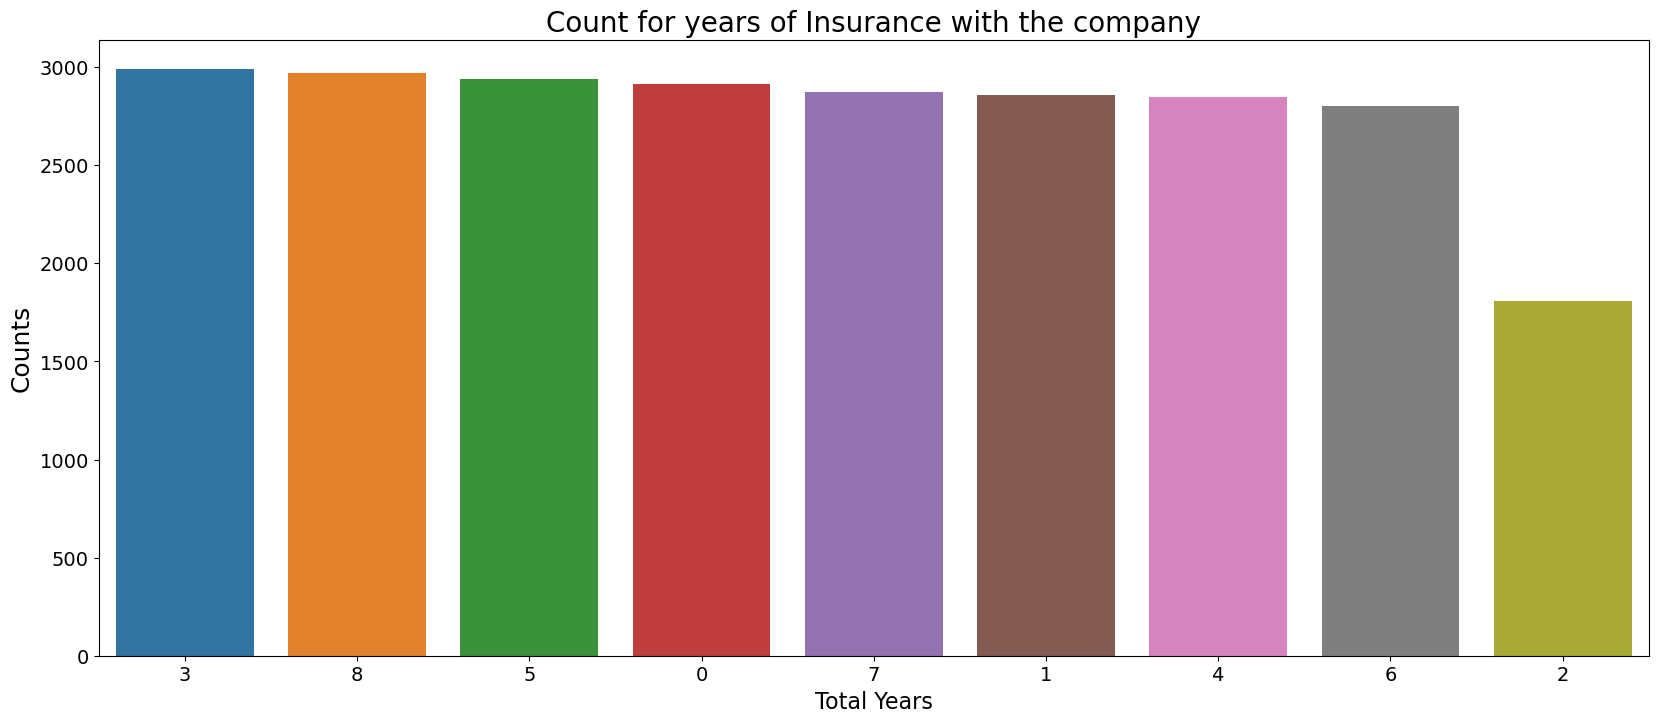

In [14]:
# df['years_of_insurance_with_us'].value_counts()

plt.figure(figsize=(20,8))
plt.title('Count for years of Insurance with the company', fontsize=20)
sns.countplot(data = df, x = 'years_of_insurance_with_us', order=df['years_of_insurance_with_us'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Total Years', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

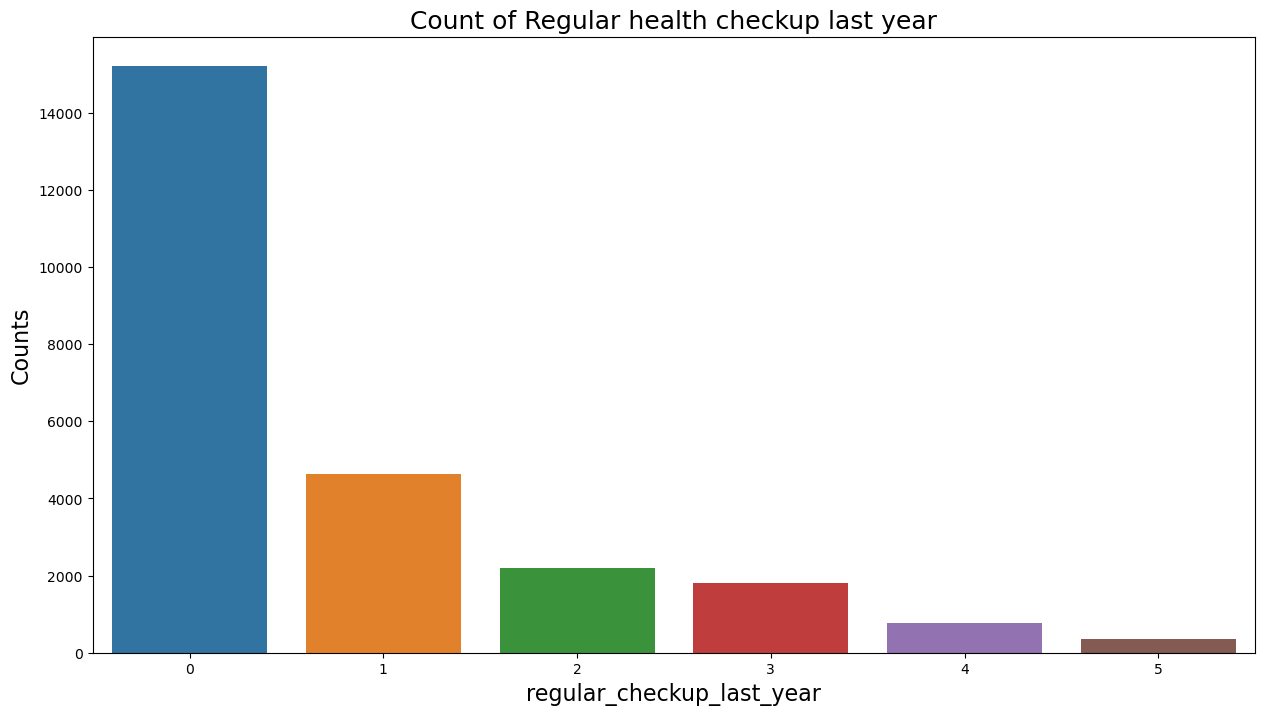

In [15]:
# df['regular_checkup_lasy_year'].value_counts()
plt.figure(figsize=(15,8))
plt.title('Count of Regular health checkup last year', fontsize=18)
sns.countplot(data = df, x = 'regular_checkup_lasy_year', order=df['regular_checkup_lasy_year'].value_counts().index)
# plt.xticks(rotation=90, fontsize=14)
plt.xlabel('regular_checkup_last_year', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.show()

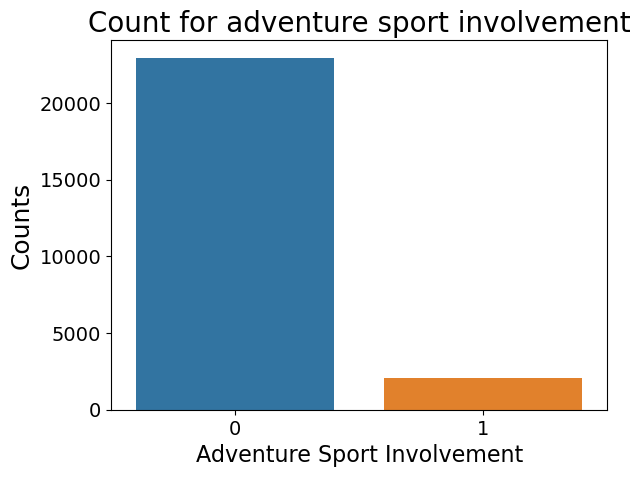

In [16]:
# df['adventure_sports'].value_counts()

plt.title('Count for adventure sport involvement', fontsize=20)
sns.countplot(data = df, x = 'adventure_sports', order=df['adventure_sports'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Adventure Sport Involvement', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

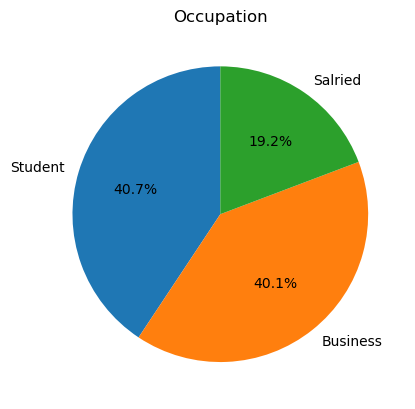

In [17]:
# df['Occupation'].value_counts()

category_counts = df['Occupation'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Occupation')
plt.show()

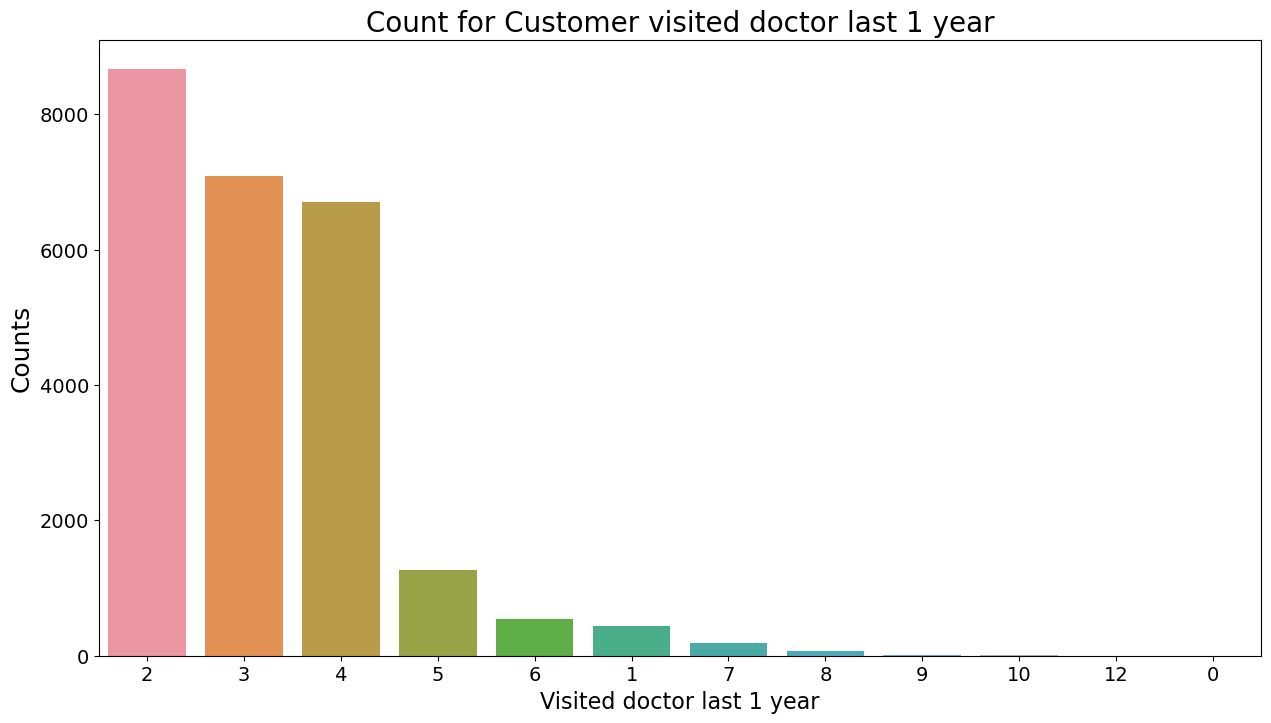

In [18]:
# df['visited_doctor_last_1_year'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Count for Customer visited doctor last 1 year', fontsize=20)
sns.countplot(data = df, x = 'visited_doctor_last_1_year', order=df['visited_doctor_last_1_year'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Visited doctor last 1 year', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

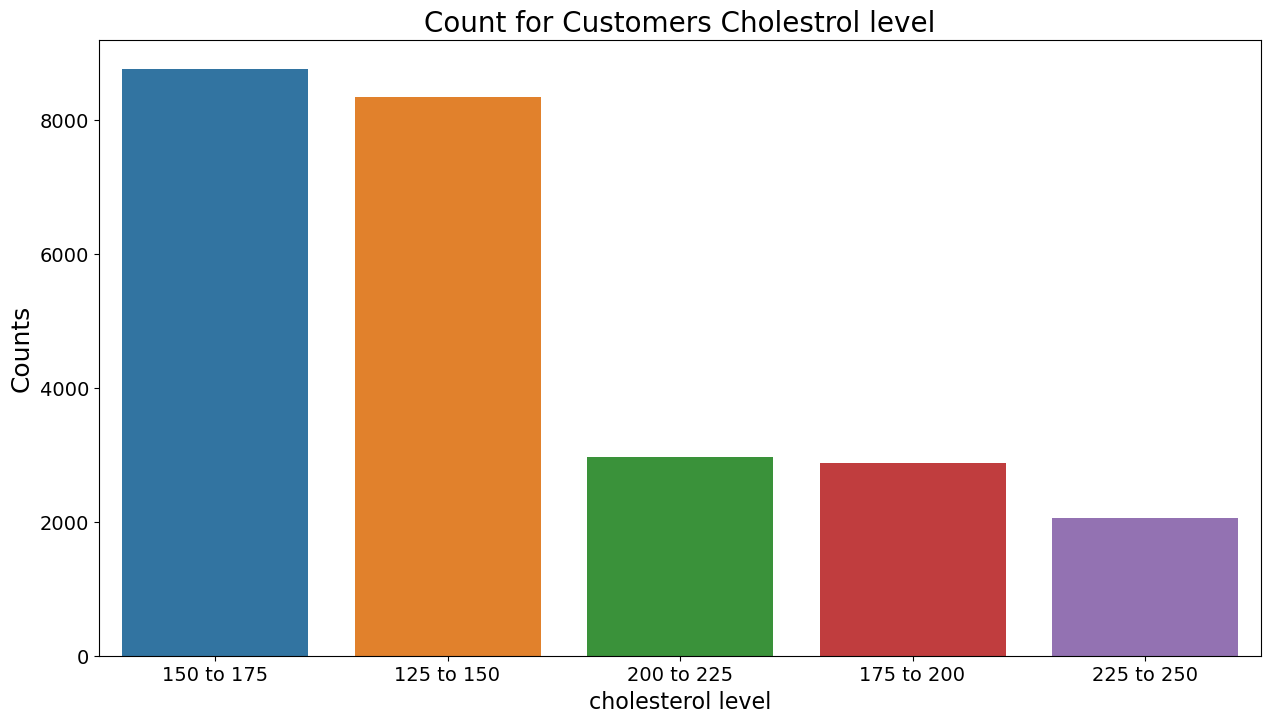

In [19]:
# df['cholesterol_level'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Count for Customers Cholestrol level', fontsize=20)
sns.countplot(data = df, x = 'cholesterol_level', order=df['cholesterol_level'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('cholesterol level', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

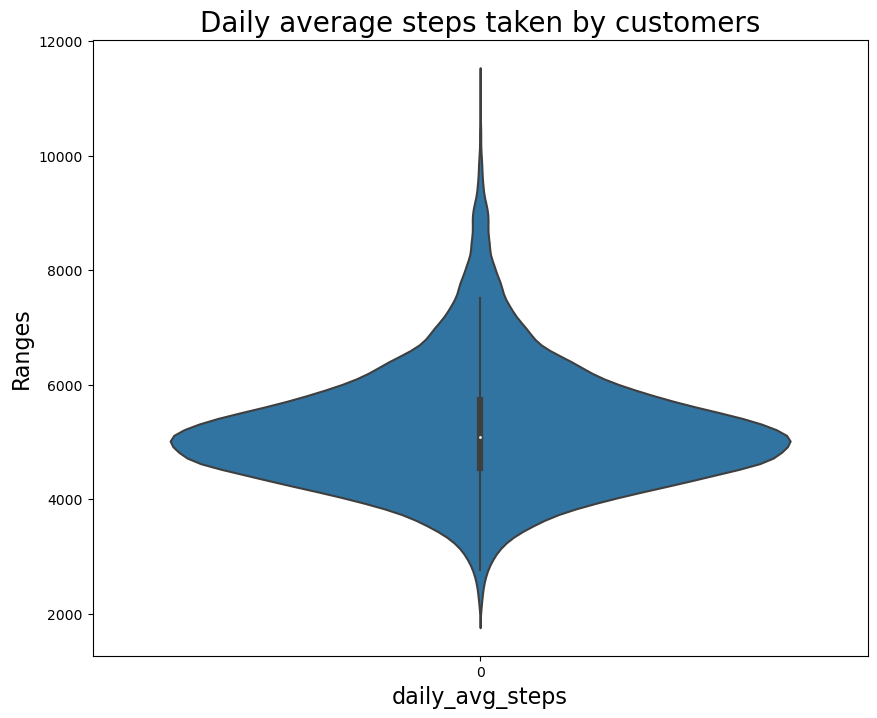

In [20]:
# daily_avg_steps

plt.figure(figsize=(10,8))
plt.title('Daily average steps taken by customers', fontsize=20)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('daily_avg_steps', fontsize=16)
sns.violinplot(df['daily_avg_steps'])
plt.show()

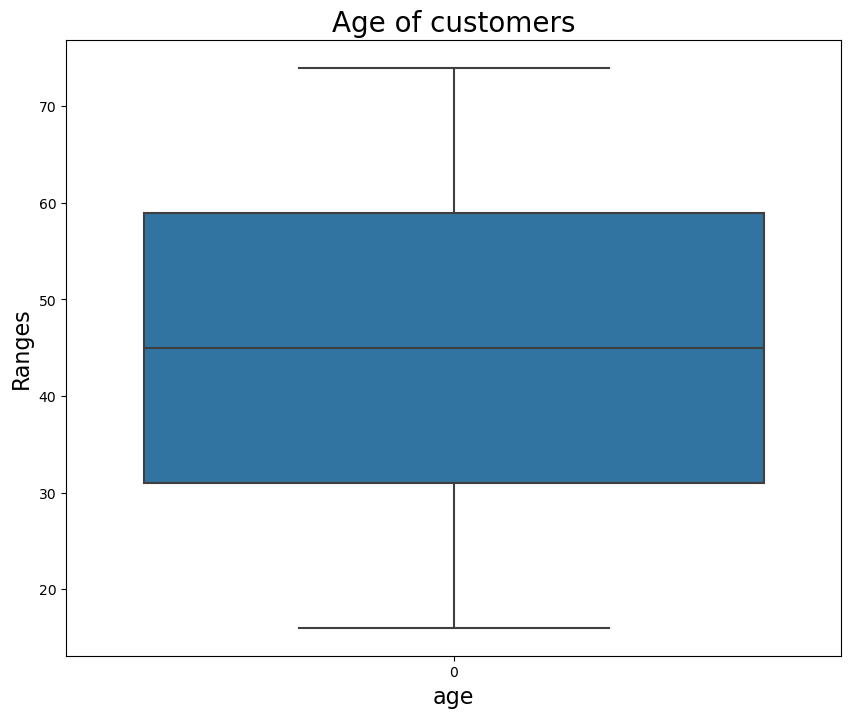

In [21]:
# age

plt.figure(figsize=(10,8))
plt.title('Age of customers', fontsize=20)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('age', fontsize=16)
sns.boxplot(df['age'])
plt.show()

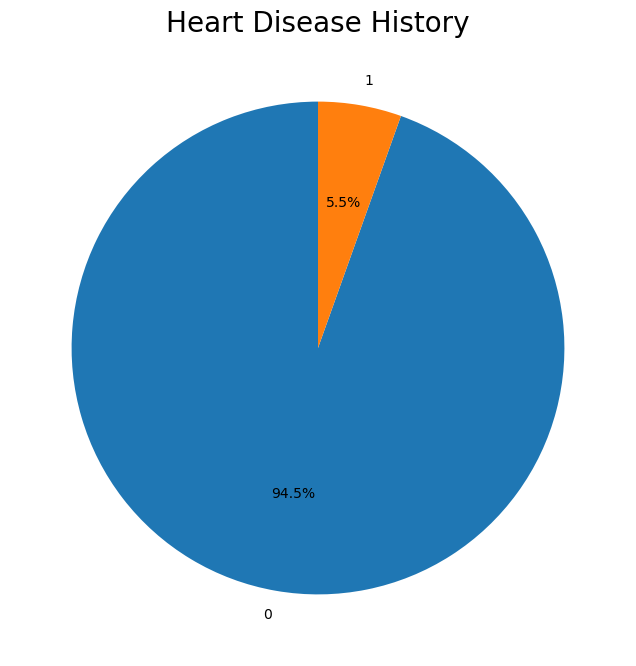

In [22]:
# df['heart_decs_history'].value_counts()

plt.figure(figsize=(8,8))
category_counts = df['heart_decs_history'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease History', fontsize = 20)
plt.show()

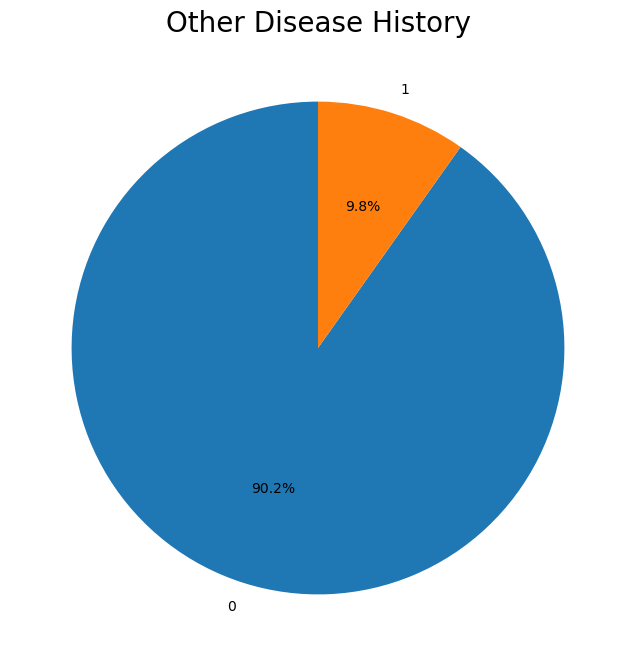

In [23]:
# df['other_major_decs_history'].value_counts()

plt.figure(figsize=(8,8))
category_counts = df['other_major_decs_history'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Other Disease History', fontsize = 20)
plt.show()

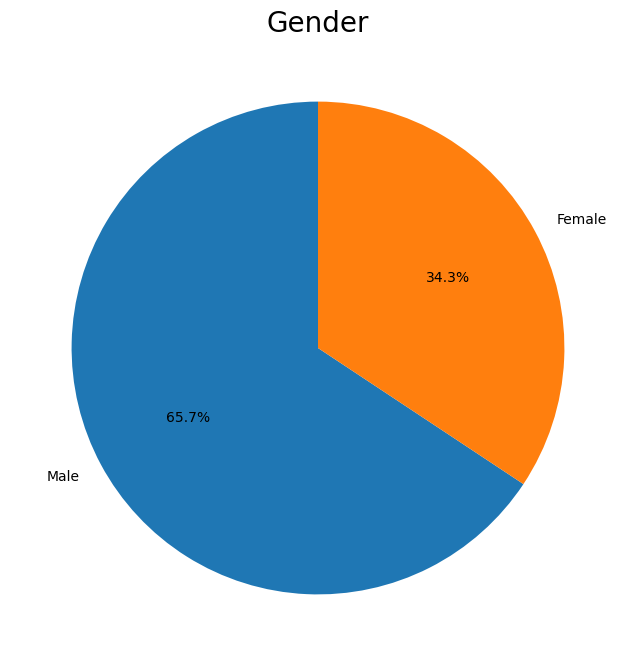

In [24]:
plt.figure(figsize=(8,8))
category_counts = df['Gender'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender', fontsize = 20)
plt.show()

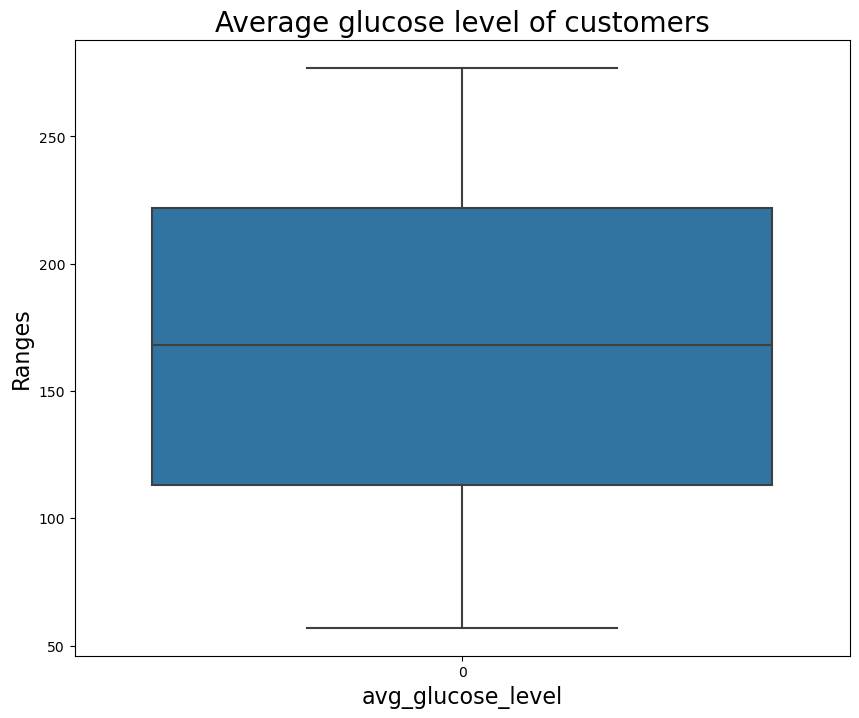

In [25]:
# avg_glucose_level

plt.figure(figsize=(10,8))
plt.title('Average glucose level of customers', fontsize=20)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('avg_glucose_level', fontsize=16)
sns.boxplot(df['avg_glucose_level'])
plt.show()

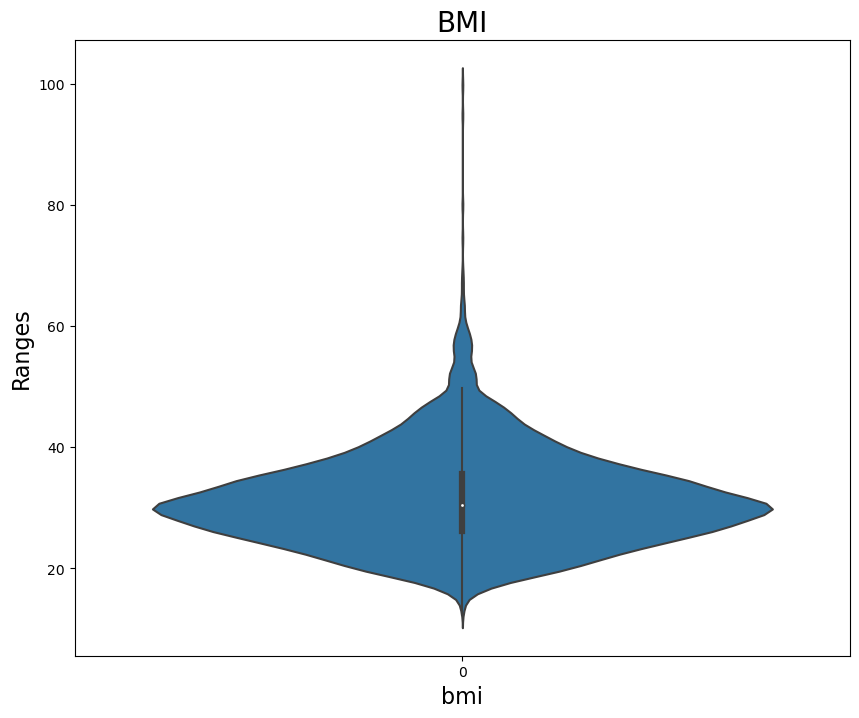

In [26]:
# bmi

plt.figure(figsize=(10,8))
plt.title('BMI', fontsize=20)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('bmi', fontsize=16)
sns.violinplot(df['bmi'])
plt.show()

## Year last admitted needs to be cross checked what plot needs to be used

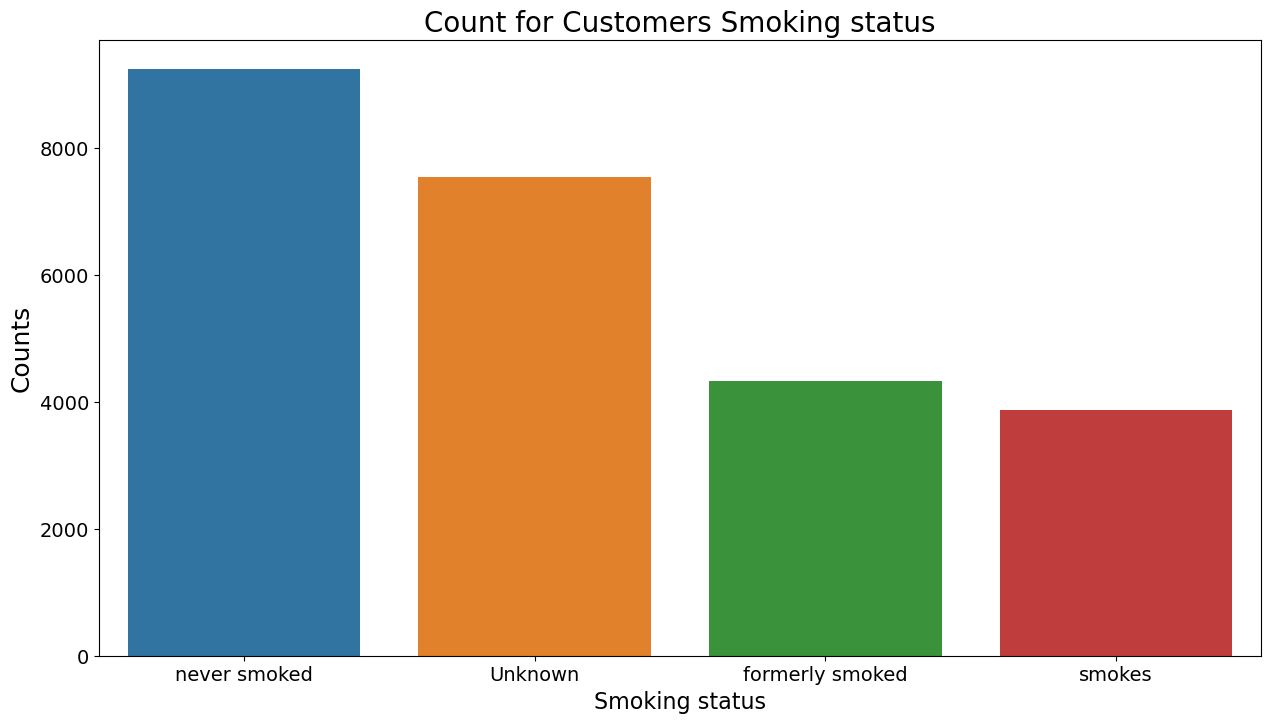

In [27]:
# df['smoking_status'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Count for Customers Smoking status', fontsize=20)
sns.countplot(data = df, x = 'smoking_status', order=df['smoking_status'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Smoking status', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

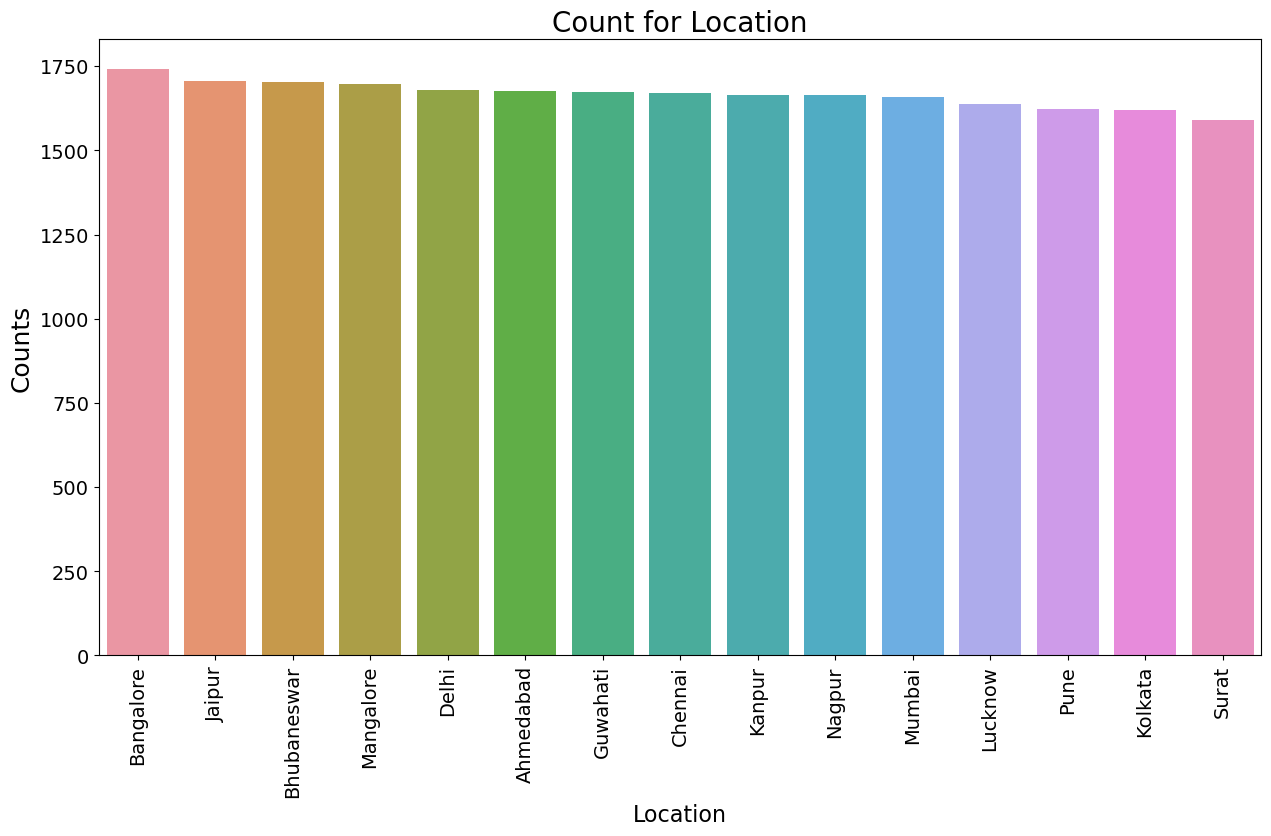

In [28]:
# df['Location'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Count for Location', fontsize=20)
sns.countplot(data = df, x = 'Location', order=df['Location'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Location', fontsize=16)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

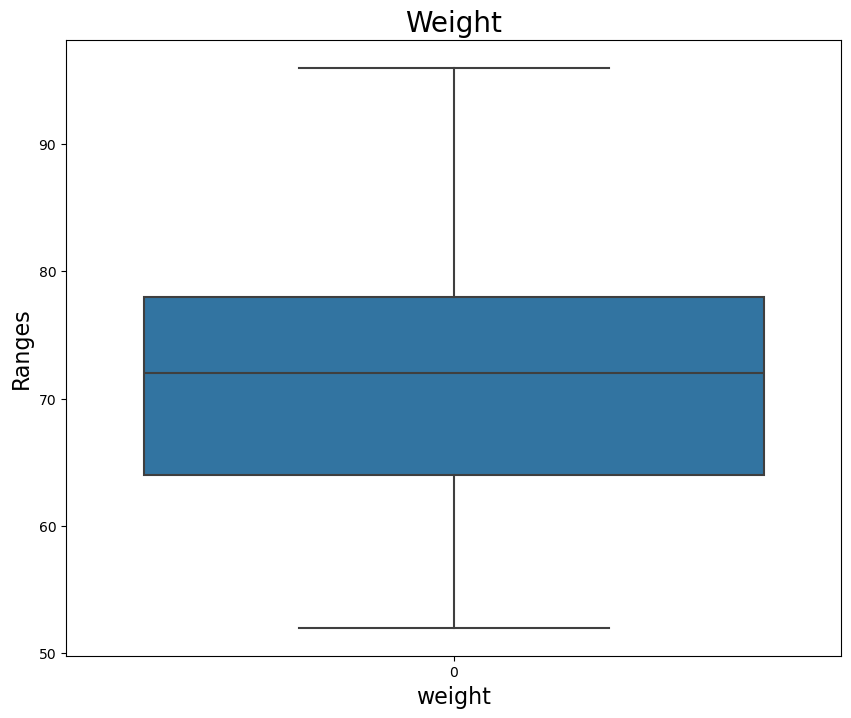

In [29]:
# weight

plt.figure(figsize=(10,8))
plt.title('Weight', fontsize=20)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('weight', fontsize=16)
sns.boxplot(df['weight'])
plt.show()

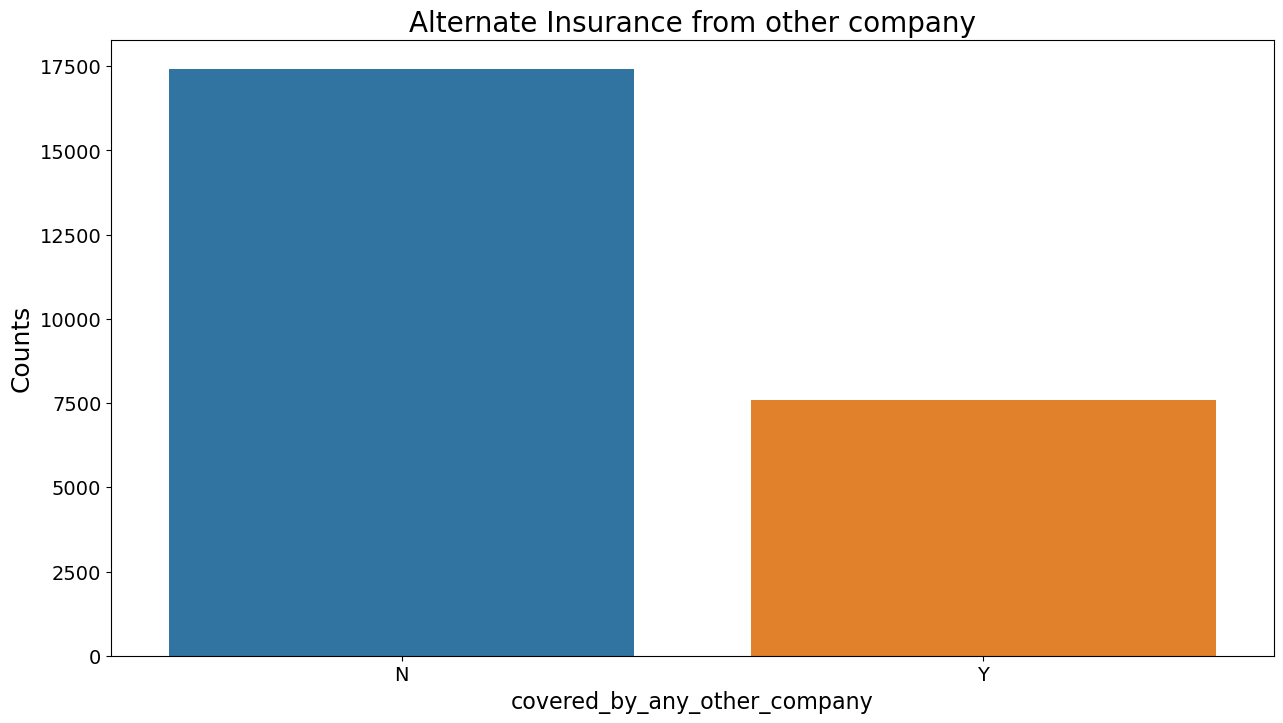

In [30]:
# df['covered_by_any_other_company'].value_counts()

plt.figure(figsize=(15,8))
plt.title('Alternate Insurance from other company', fontsize=20)
sns.countplot(data = df, x = 'covered_by_any_other_company', order=df['covered_by_any_other_company'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('covered_by_any_other_company', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

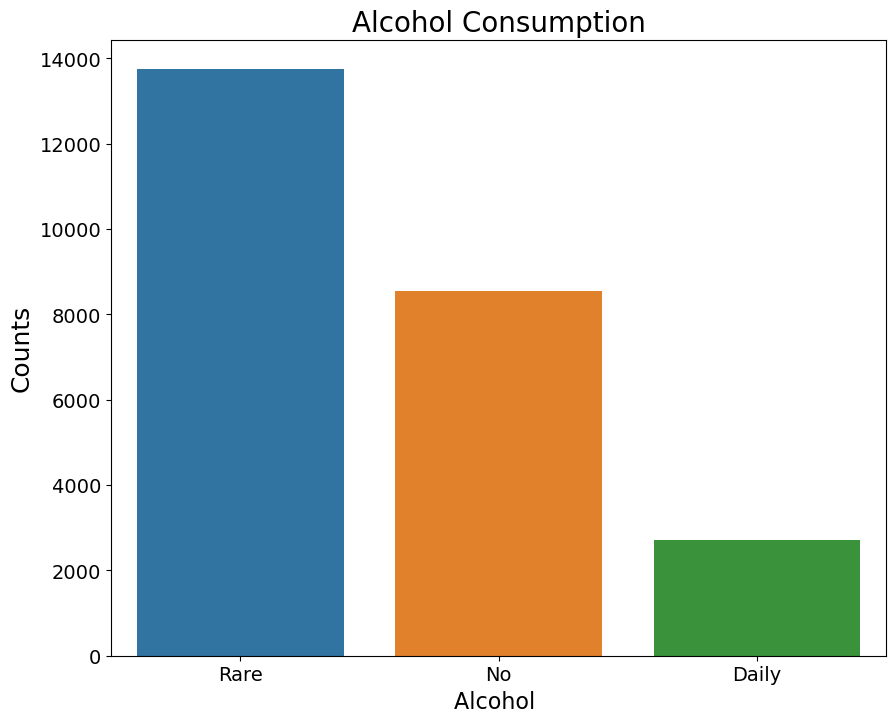

In [31]:
# df['Alcohol'].value_counts()

plt.figure(figsize=(10,8))
plt.title('Alcohol Consumption', fontsize=20)
sns.countplot(data = df, x = 'Alcohol', order=df['Alcohol'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Alcohol ', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

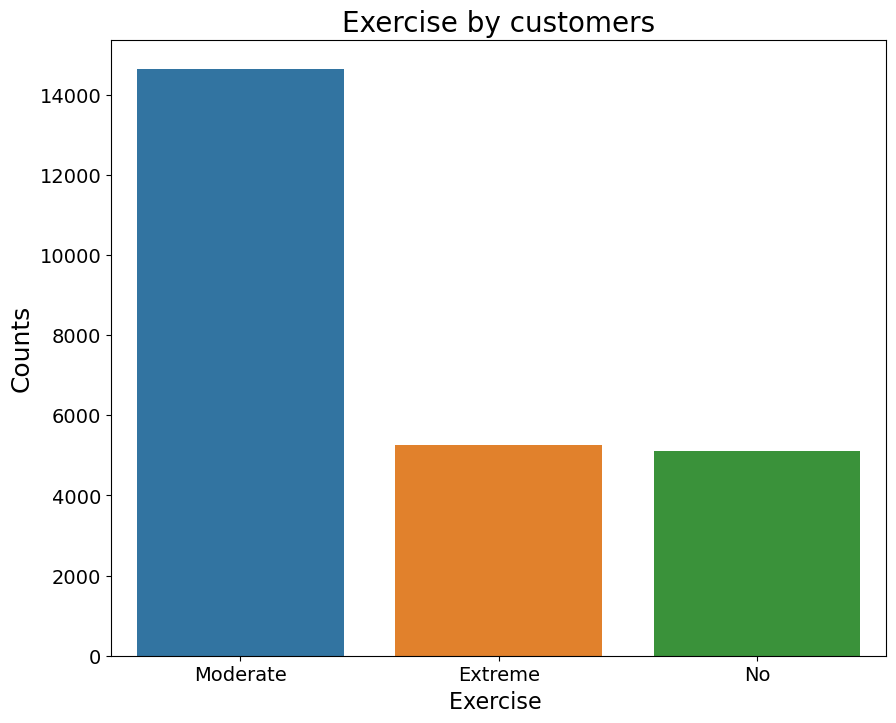

In [32]:
# df['exercise'].value_counts()

plt.figure(figsize=(10,8))
plt.title('Exercise by customers', fontsize=20)
sns.countplot(data = df, x = 'exercise', order=df['exercise'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Exercise ', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

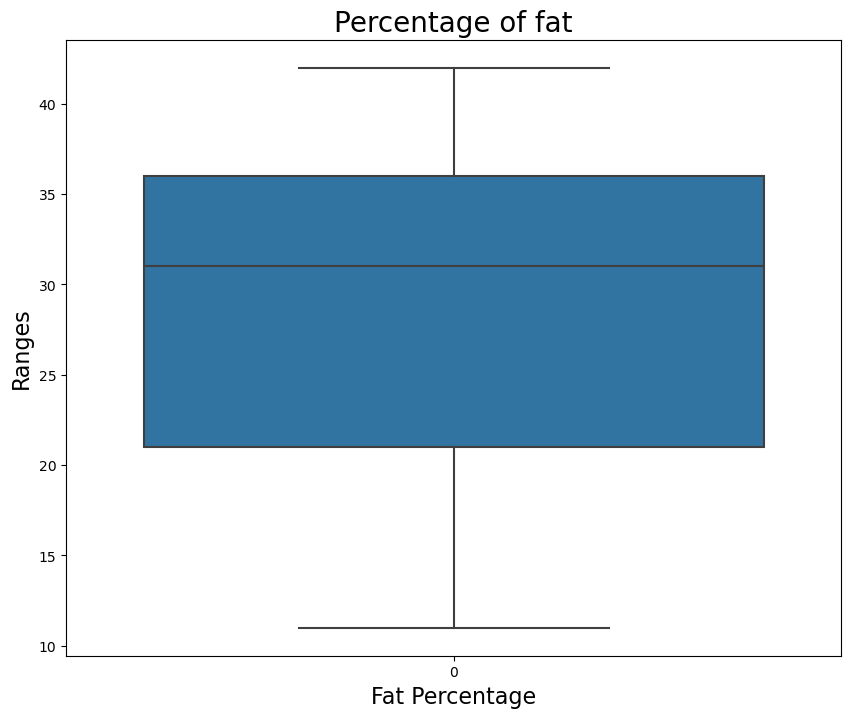

In [33]:
# fat_percentage

plt.figure(figsize=(10,8))
plt.title('Percentage of fat', fontsize=20)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('Fat Percentage', fontsize=16)
sns.boxplot(df['fat_percentage'])
plt.show()

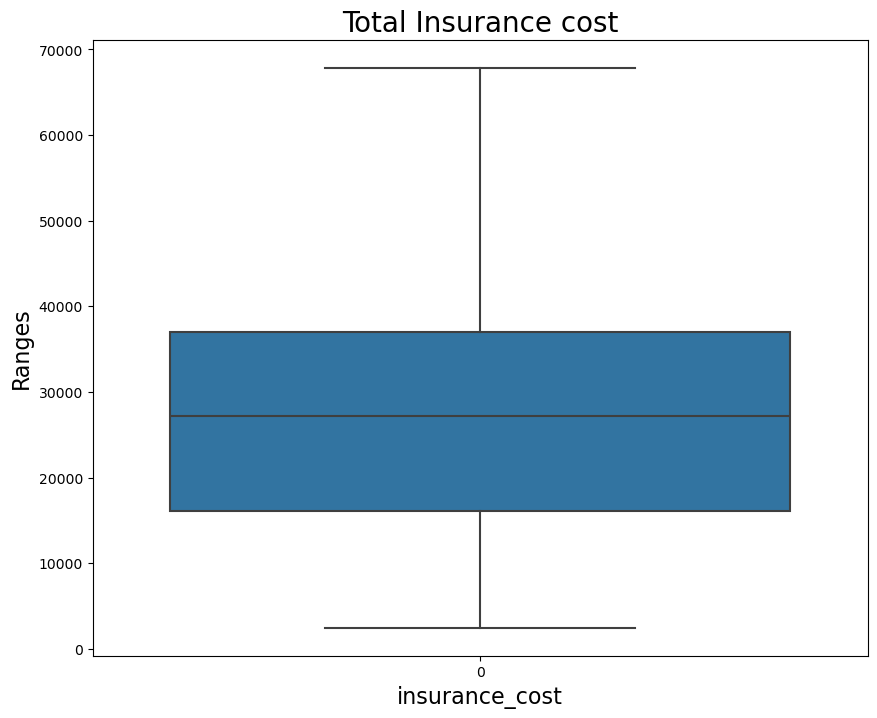

In [34]:
# insurance_cost

plt.figure(figsize=(10,8))
plt.title('Total Insurance cost', fontsize=20)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('insurance_cost', fontsize=16)
sns.boxplot(df['insurance_cost'])
plt.show()

# Bivariate Analysis

## Part-1

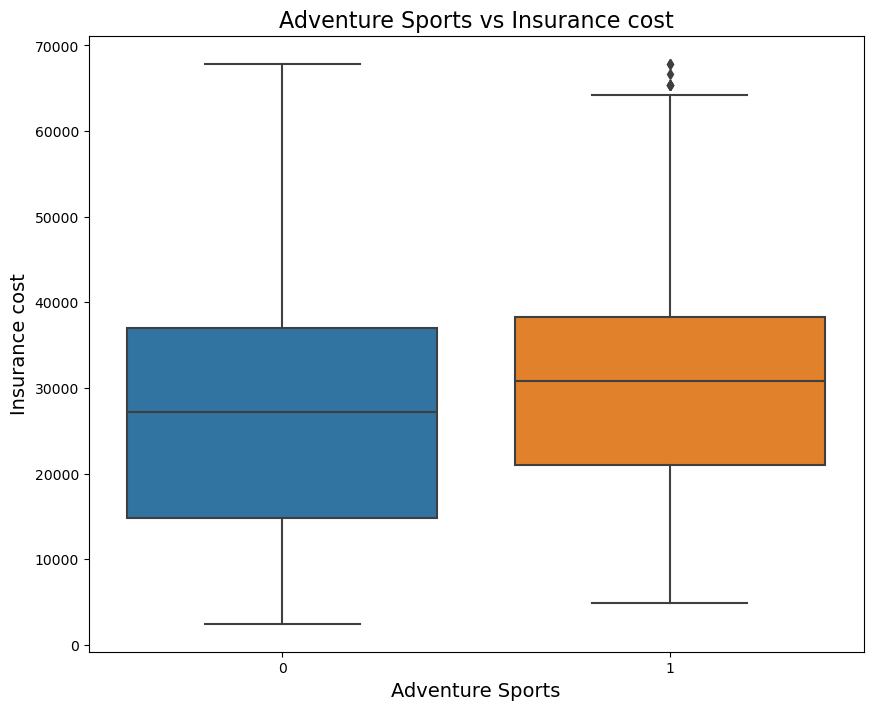

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x='adventure_sports', y='insurance_cost')
plt.xlabel('Adventure Sports', fontsize=14)
plt.ylabel('Insurance cost', fontsize=14)
plt.title('Adventure Sports vs Insurance cost', fontsize=16)
plt.show()

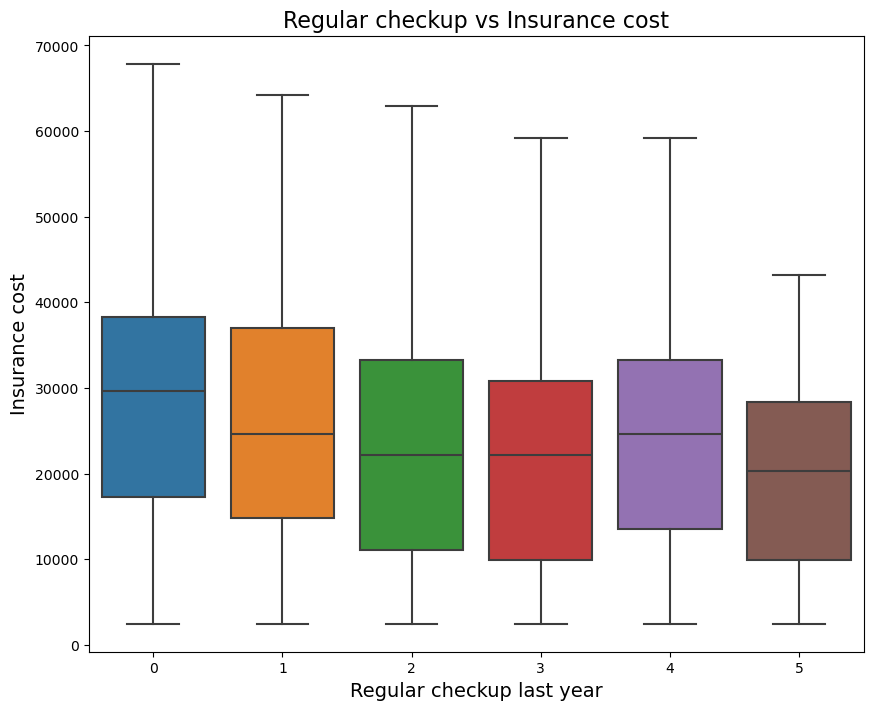

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x='regular_checkup_lasy_year', y='insurance_cost')
plt.xlabel('Regular checkup last year', fontsize=14)
plt.ylabel('Insurance cost', fontsize=14)
plt.title('Regular checkup vs Insurance cost', fontsize=16)
plt.show()

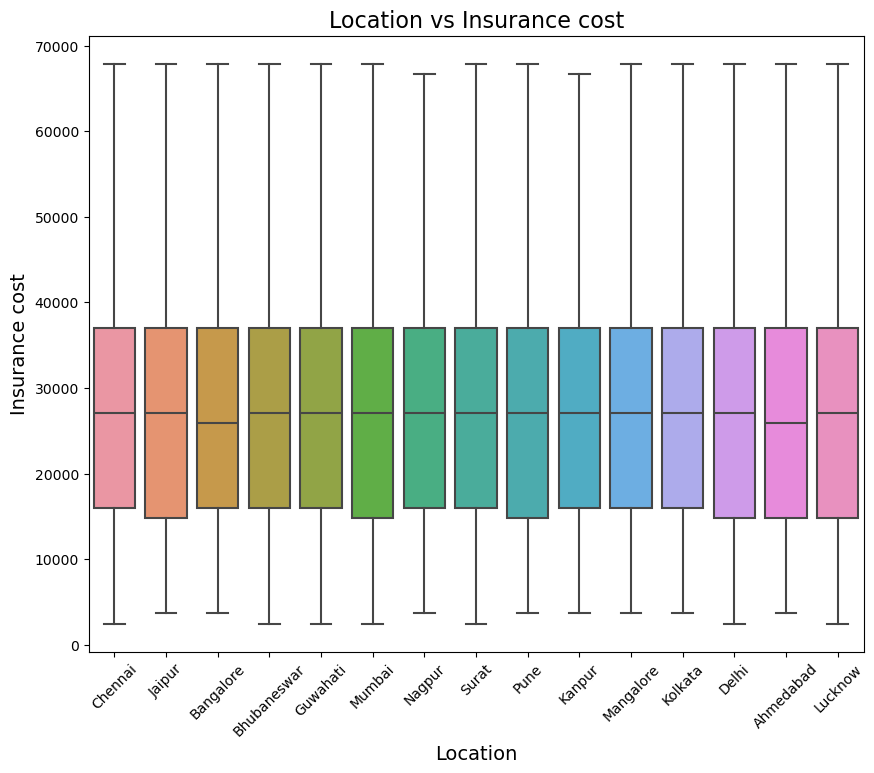

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x='Location', y='insurance_cost')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Insurance cost', fontsize=14)
plt.title('Location vs Insurance cost', fontsize=16)
plt.xticks(rotation=45)
plt.show()

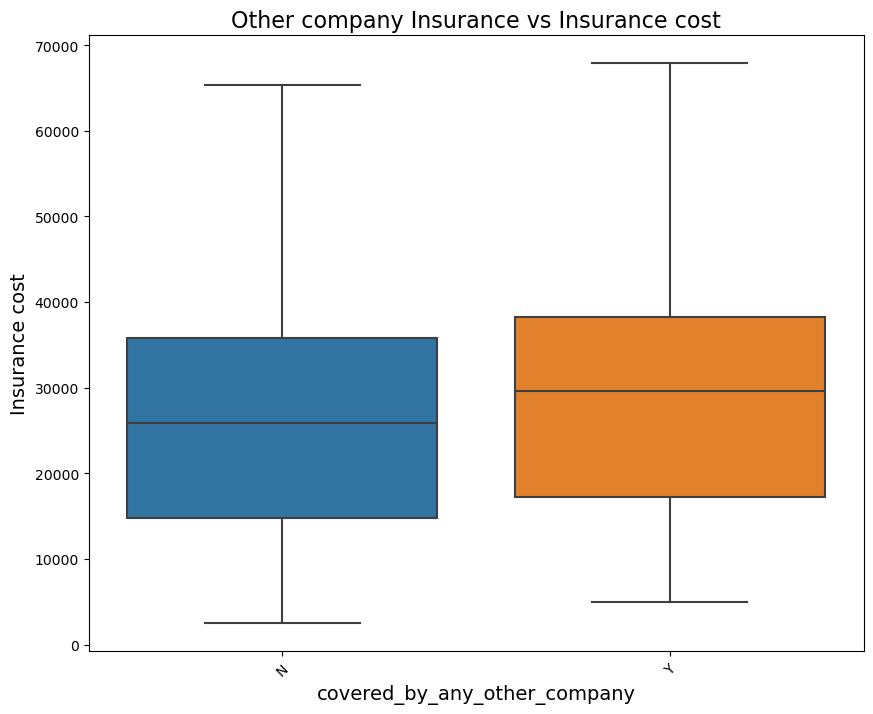

In [38]:
# covered_by_any_other_company

plt.figure(figsize=(10,8))
sns.boxplot(data = df, x='covered_by_any_other_company', y='insurance_cost')
plt.xlabel('covered_by_any_other_company', fontsize=14)
plt.ylabel('Insurance cost', fontsize=14)
plt.title('Other company Insurance vs Insurance cost', fontsize=16)
plt.xticks(rotation=45)
plt.show()

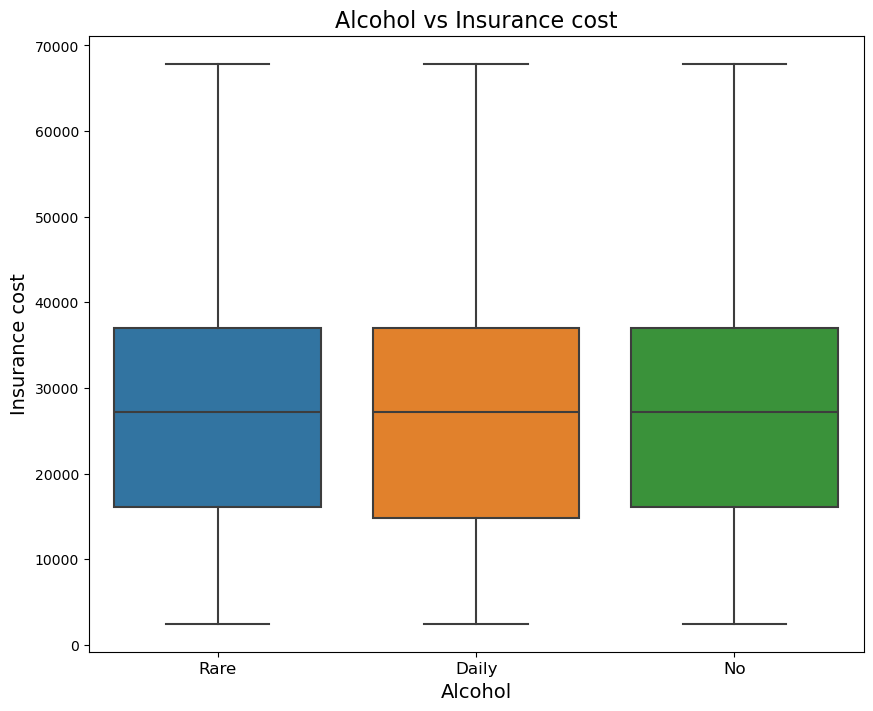

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x='Alcohol', y='insurance_cost')
plt.xlabel('Alcohol', fontsize=14)
plt.ylabel('Insurance cost', fontsize=14)
plt.title('Alcohol vs Insurance cost', fontsize=16)
plt.xticks(fontsize=12)
plt.show()

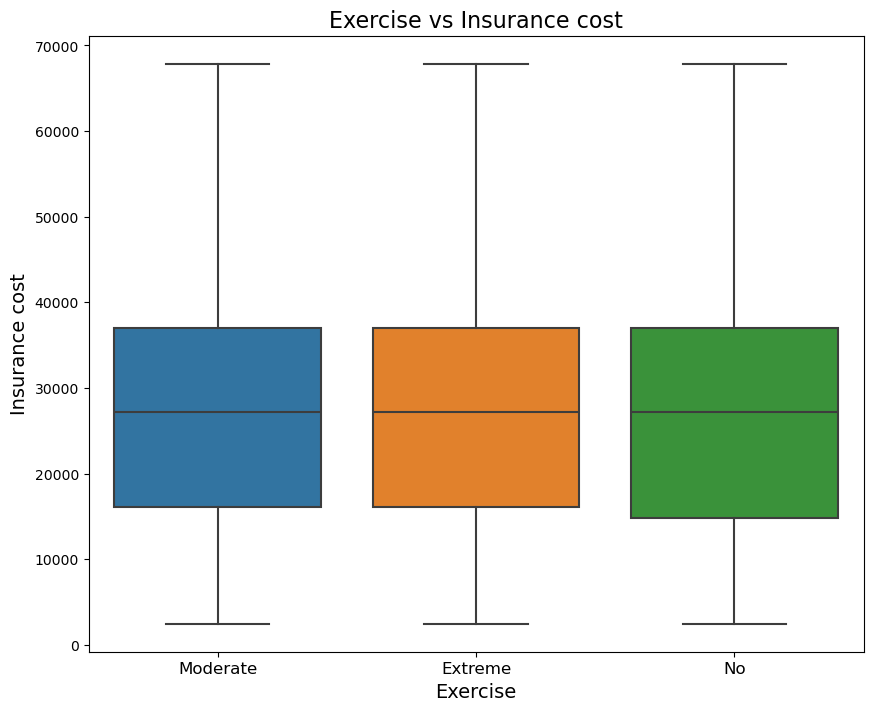

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x='exercise', y='insurance_cost')
plt.xlabel('Exercise', fontsize=14)
plt.ylabel('Insurance cost', fontsize=14)
plt.title('Exercise vs Insurance cost', fontsize=16)
plt.xticks(fontsize=12)
plt.show()

## Occupation and insights wrt their cholestrol level

In [41]:
df_student = df.loc[df['Occupation'] == 'Student'].reset_index(drop=True)
df_salaried = df.loc[df['Occupation'] == 'Salried'].reset_index(drop=True)
df_business = df.loc[df['Occupation'] == 'Business'].reset_index(drop=True)

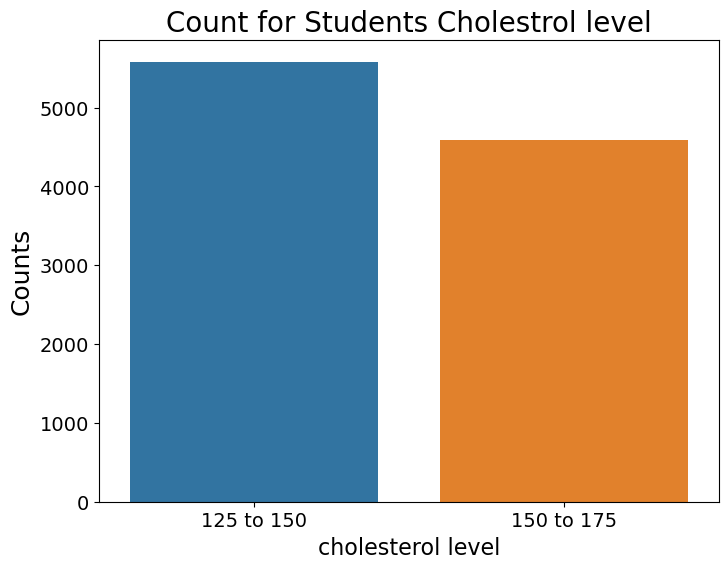

In [42]:
plt.figure(figsize=(8,6))
plt.title('Count for Students Cholestrol level', fontsize=20)
sns.countplot(data = df_student, x = 'cholesterol_level', order=df_student['cholesterol_level'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('cholesterol level', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

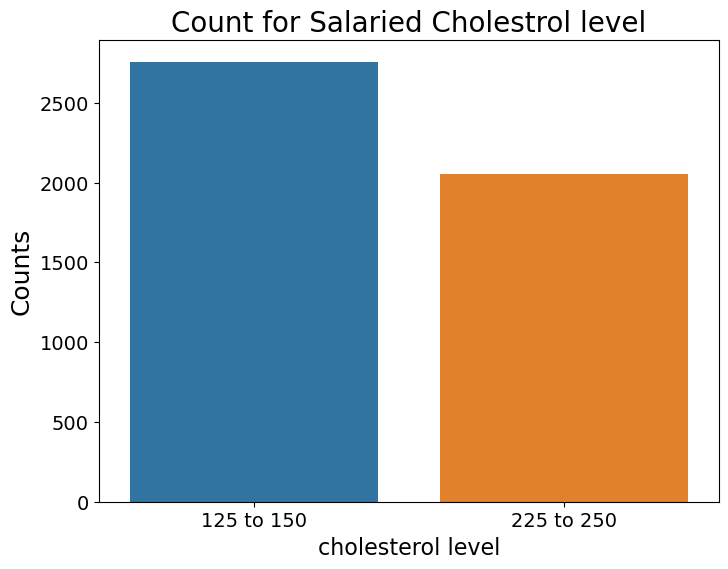

In [43]:
plt.figure(figsize=(8,6))
plt.title('Count for Salaried Cholestrol level', fontsize=20)
sns.countplot(data = df_salaried, x = 'cholesterol_level', order=df_salaried['cholesterol_level'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('cholesterol level', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

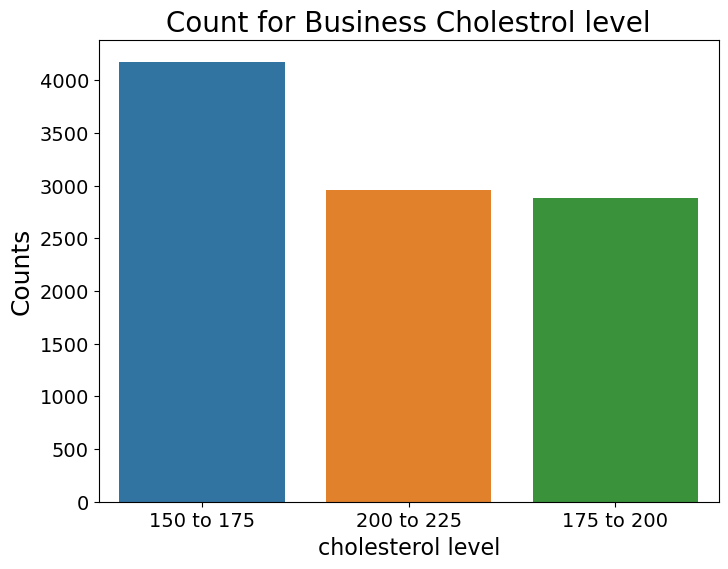

In [44]:
plt.figure(figsize=(8,6))
plt.title('Count for Business Cholestrol level', fontsize=20)
sns.countplot(data = df_business, x = 'cholesterol_level', order=df_business['cholesterol_level'].value_counts().index)
# plt.xticks(rotation=90, fontsize=12)
plt.xlabel('cholesterol level', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Counts', fontsize=18)
plt.show()

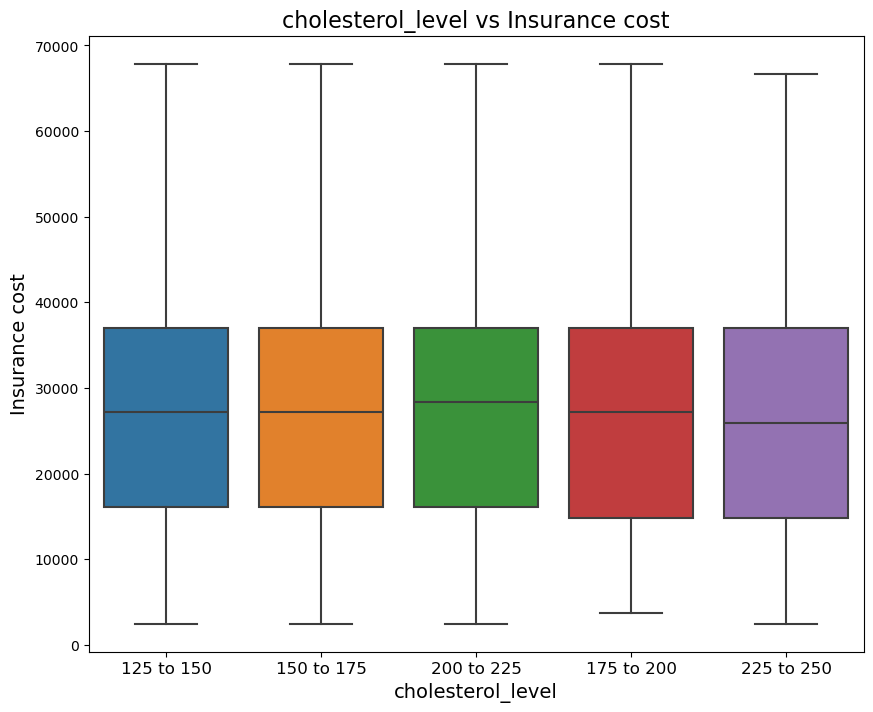

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x='cholesterol_level', y='insurance_cost')
plt.xlabel('cholesterol_level', fontsize=14)
plt.ylabel('Insurance cost', fontsize=14)
plt.title('cholesterol_level vs Insurance cost', fontsize=16)
plt.xticks(fontsize=12)
plt.show()

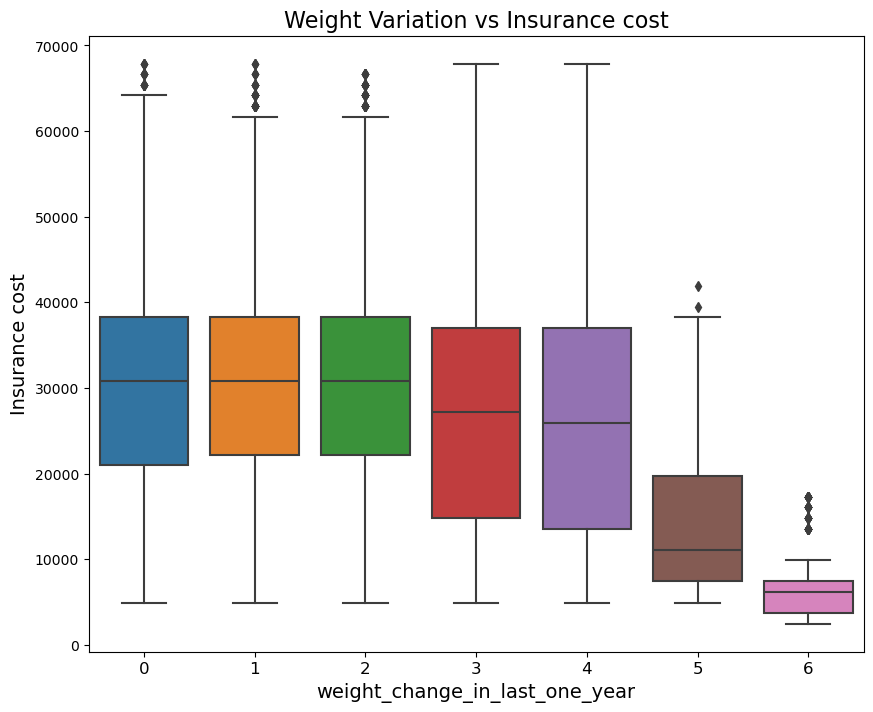

In [46]:
# weight_change_in_last_one_year

plt.figure(figsize=(10,8))
sns.boxplot(data = df, x='weight_change_in_last_one_year', y='insurance_cost')
plt.xlabel('weight_change_in_last_one_year', fontsize=14)
plt.ylabel('Insurance cost', fontsize=14)
plt.title('Weight Variation vs Insurance cost', fontsize=16)
plt.xticks(fontsize=12)
plt.show()

## Part-2

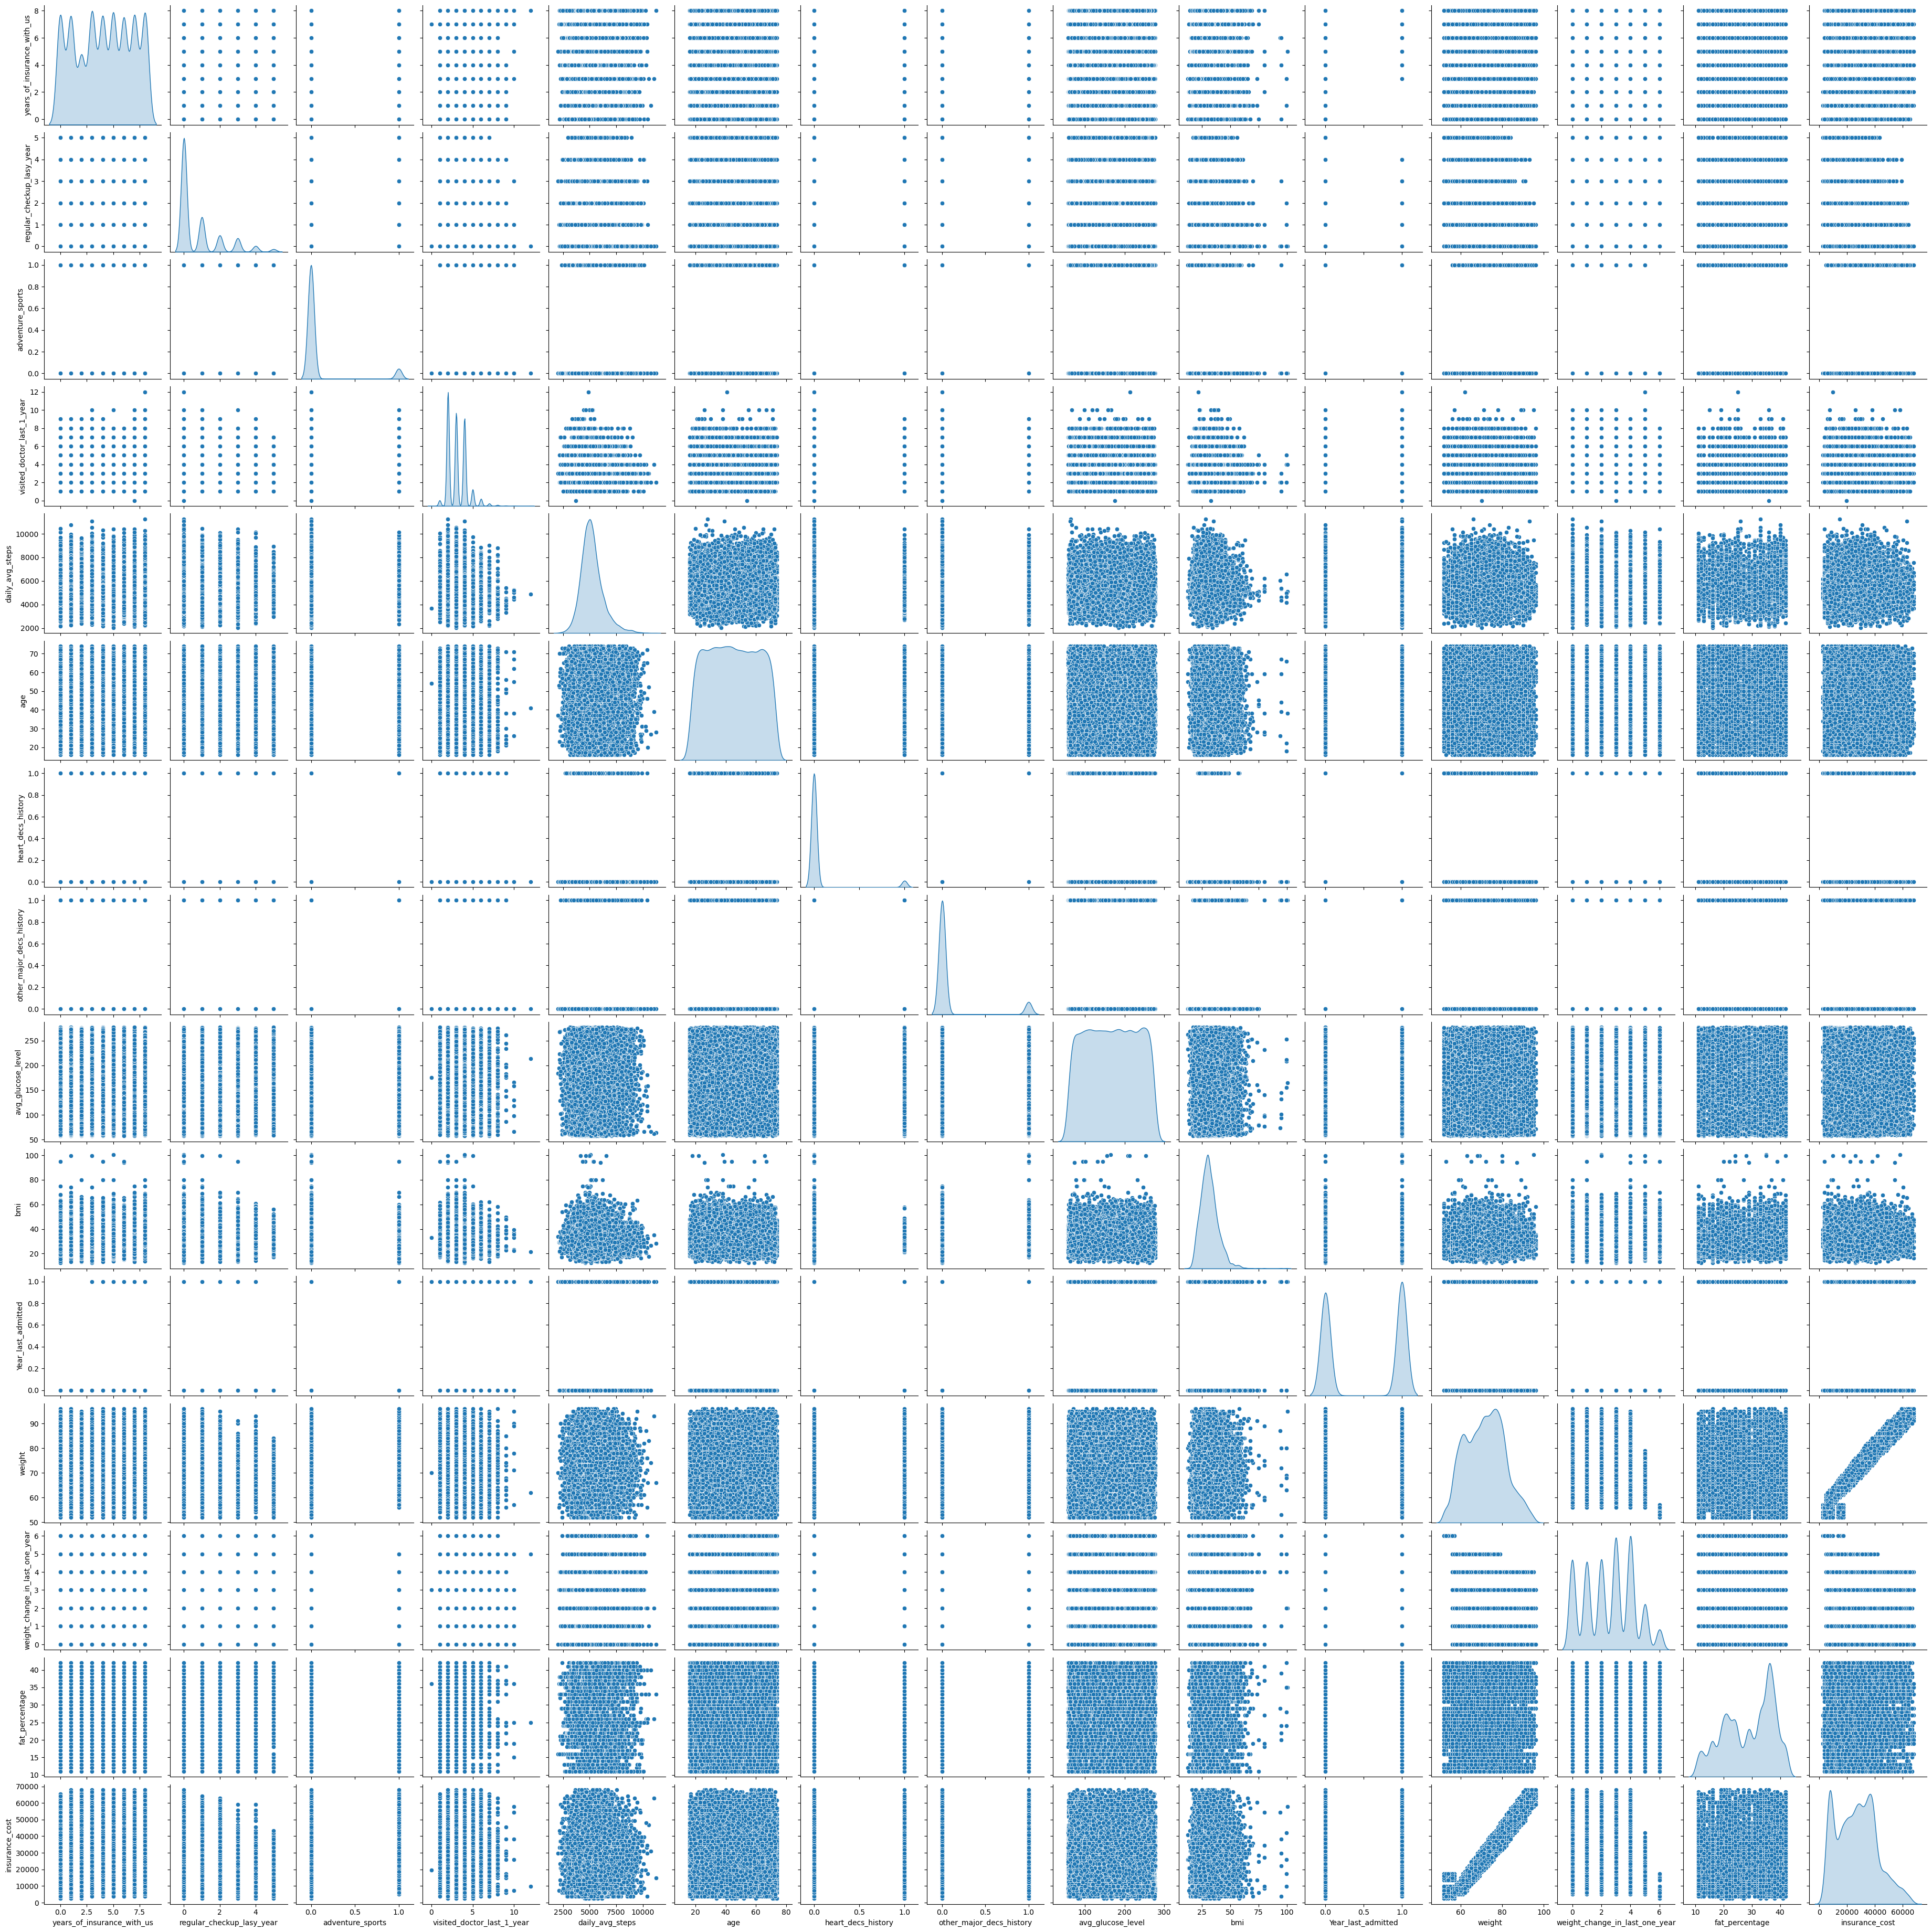

In [47]:
sns.pairplot(df, diag_kind="kde")
plt.show()

In [48]:
df_uni = df[['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'fat_percentage', 'insurance_cost']]

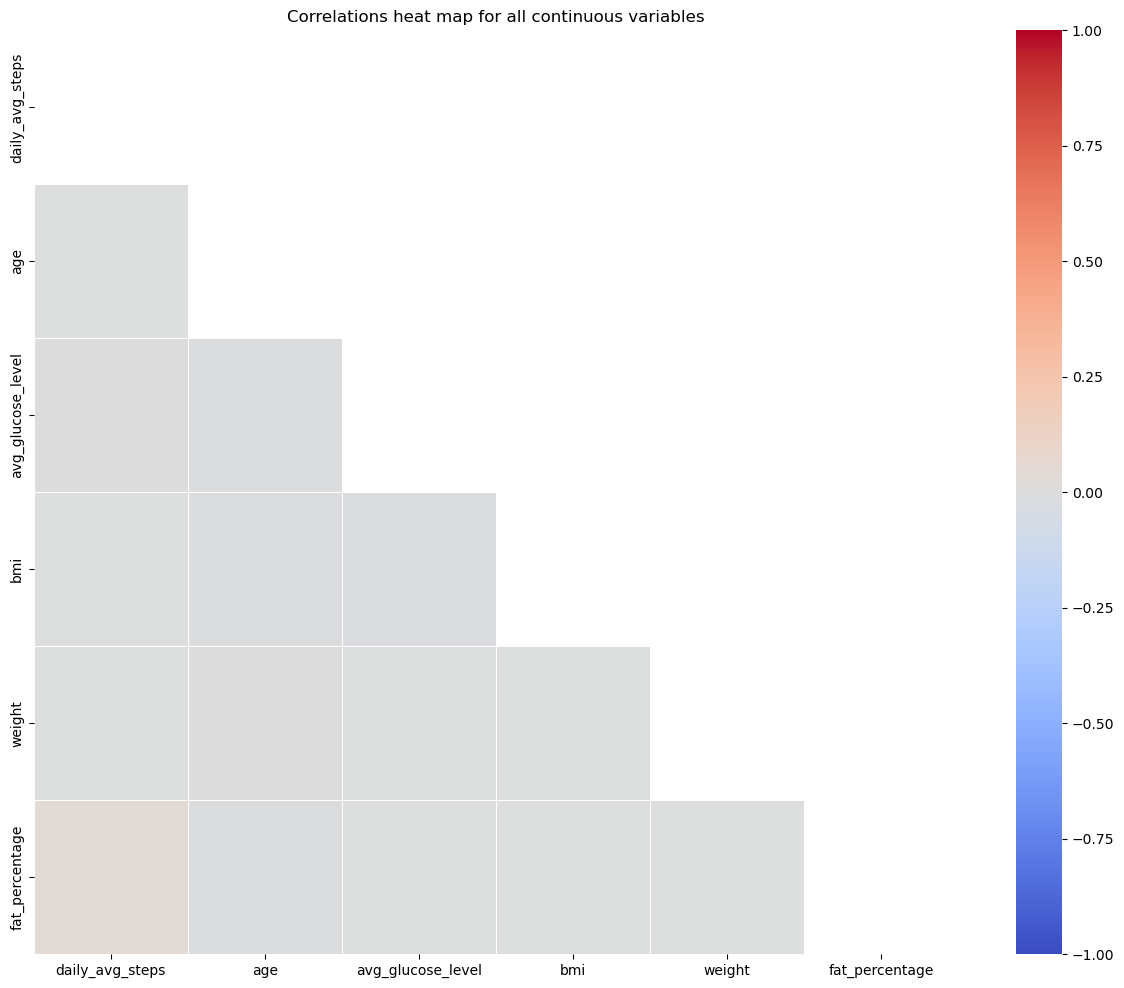

In [49]:
correlation_matrix = df_uni.drop('insurance_cost', axis=1).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".5f", linewidths=.5, square=True, mask=mask, annot_kws={"size": 10}, vmin=-1, vmax=1)
plt.title("Correlations heat map for all continuous variables")

# Show the plot
plt.show()

In [50]:
correlation_matrix

daily_avg_steps       age  avg_glucose_level       bmi  \
daily_avg_steps           1.000000 -0.000313           0.000482 -0.005696   
age                      -0.000313  1.000000          -0.011551 -0.015071   
avg_glucose_level         0.000482 -0.011551           1.000000 -0.019289   
bmi                      -0.005696 -0.015071          -0.019289  1.000000   
weight                   -0.005768  0.001676          -0.004684 -0.007804   
fat_percentage            0.045827 -0.007946          -0.000498 -0.003176   

                     weight  fat_percentage  
daily_avg_steps   -0.005768        0.045827  
age                0.001676       -0.007946  
avg_glucose_level -0.004684       -0.000498  
bmi               -0.007804       -0.003176  
weight             1.000000       -0.007377  
fat_percentage    -0.007377        1.000000

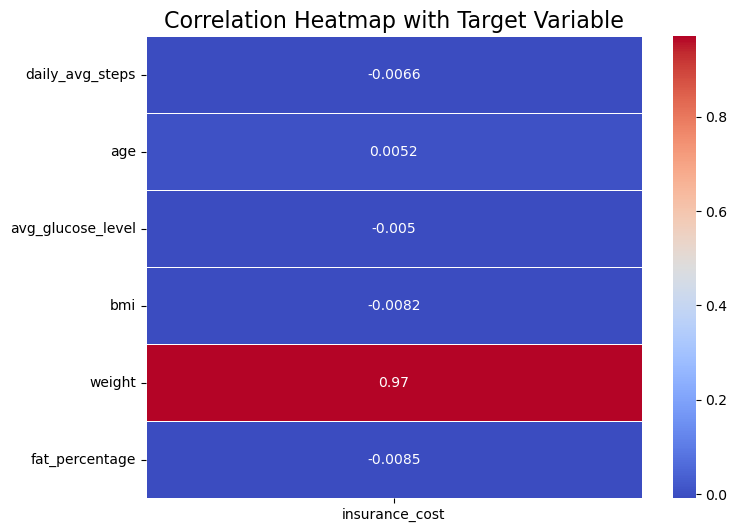

In [51]:

correlation_matrix = df_uni.corr()

# Filter the correlation matrix to include only correlations with the target variable
target_correlation = correlation_matrix[['insurance_cost']].drop('insurance_cost')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Target Variable', fontsize=16)
plt.yticks(rotation=360)
plt.show()

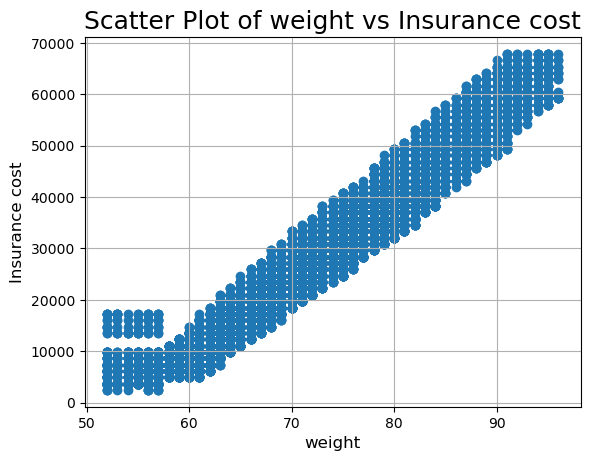

In [52]:
plt.scatter(df['weight'], df['insurance_cost'])
plt.title('Scatter Plot of weight vs Insurance cost', fontsize=18)
plt.xlabel('weight', fontsize=12)
plt.ylabel('Insurance cost', fontsize=12)
plt.grid(True)
plt.show()

## Converting string to integer values for machine readability

In [53]:
# Dropping Smoking status owing to presence of too many unknown variables
df = df.drop('smoking_status', axis=1)

In [54]:
df.shape

(25000, 22)

In [55]:
# Define encoding for each feature
preprocessor = ColumnTransformer(
    transformers=[
        ('occupation', OneHotEncoder(drop='first'), ['Occupation']),
        ('cholesterol', OrdinalEncoder(categories=[['125 to 150', '150 to 175', '175 to 200', '200 to 225', '225 to 250']]), ['cholesterol_level']),
        ('alcohol', OrdinalEncoder(categories=[['No', 'Rare', 'Daily']]), ['Alcohol']),
        ('Exercise', OrdinalEncoder(categories=[['No', 'Moderate', 'Extreme']]), ['exercise'])
    ],
    remainder='passthrough'  # Keeps the target column as is
)

# Fit and transform the data
transformed_df = preprocessor.fit_transform(df)

# Convert to DataFrame for better visualization
transformed_df = pd.DataFrame(transformed_df, columns=preprocessor.get_feature_names_out())

In [56]:
transformed_df.columns = transformed_df.columns.str.split('__').str[-1]

In [57]:
gender = {'Male': 1, 'Female': 0}
covered_by_any_other_company = {'Y': 1, 'N': 0}

# Map values in 'gender' column
transformed_df['Gender'] = transformed_df['Gender'].map(gender)
transformed_df['covered_by_any_other_company'] = transformed_df['covered_by_any_other_company'].map(covered_by_any_other_company)

## Convert Location categorical column into numerical

#### One hot encoding will create more number of features since the categories in Location variable are 15. This will create 15 additional variables to the data taking the shape of data from 23 features to 38.

In [58]:
df1 = transformed_df.copy()

In [59]:
# Frequency/Count Encoding
# location_counts = df1['Location'].value_counts()
# df1['Location_Count'] = transformed_df['Location'].map(location_counts)
# df1 = df1.drop('Location', axis=1)

In [60]:
# One hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity
encoded_location = encoder.fit_transform(df1[['Location']])
encoded_location_df = pd.DataFrame(encoded_location, columns=encoder.get_feature_names_out(['Location']))

In [61]:
df1 = df1.drop('Location', axis=1)
df1 = pd.concat([df1, encoded_location_df], axis=1)
df1

Occupation_Salried Occupation_Student cholesterol_level Alcohol  \
0                    1.0                0.0               0.0     1.0   
1                    0.0                1.0               1.0     1.0   
2                    0.0                0.0               3.0     2.0   
3                    0.0                0.0               2.0     1.0   
4                    0.0                1.0               1.0     0.0   
...                  ...                ...               ...     ...   
24995                1.0                0.0               4.0     1.0   
24996                0.0                0.0               3.0     1.0   
24997                0.0                1.0               1.0     1.0   
24998                1.0                0.0               4.0     1.0   
24999                0.0                0.0               1.0     0.0   

      exercise years_of_insurance_with_us regular_checkup_lasy_year  \
0          1.0                          3                         1   
1          1.0                          0                         0   
2          2.0                          1                         0   
3          0.0                          7                         4   
4          2.0                          3                         1   
...        ...                        ...                       ...   
24995      1.0                          3                         0   
24996      1.0                          6                         0   
24997      1.0                          7                         0   
24998      1.0                          1                         0   
24999      0.0                          8                         2   

      adventure_sports visited_doctor_last_1_year daily_avg_steps  ...  \
0                    1                          2            4866  ...   
1                    0                          4            6411  ...   
2                    0                          4            4509  ...   
3                    0                          2            6214  ...   
4                    0                          2            4938  ...   
...                ...                        ...             ...  ...   
24995                0                          4            5614  ...   
24996                0                          4            4719  ...   
24997                1                          2            5624  ...   
24998                0                          2           10777  ...   
24999                0                          4            5882  ...   

      Location_Guwahati Location_Jaipur Location_Kanpur  Location_Kolkata  \
0                   0.0             0.0             0.0               0.0   
1                   0.0             1.0             0.0               0.0   
2                   0.0             1.0             0.0               0.0   
3                   0.0             0.0             0.0               0.0   
4                   0.0             0.0             0.0               0.0   
...                 ...             ...             ...               ...   
24995               0.0             0.0             1.0               0.0   
24996               0.0             0.0             1.0               0.0   
24997               0.0             0.0             0.0               0.0   
24998               0.0             0.0             0.0               0.0   
24999               0.0             0.0             0.0               0.0   

      Location_Lucknow Location_Mangalore Location_Mumbai Location_Nagpur  \
0                  0.0                0.0             0.0             0.0   
1                  0.0                0.0             0.0             0.0   
2                  0.0                0.0             0.0             0.0   
3                  0.0                0.0             0.0             0.0   
4                  0.0                0.0             0.0             0.0   


In [62]:
df1.isna().sum()

Occupation_Salried                  0
Occupation_Student                  0
cholesterol_level                   0
Alcohol                             0
exercise                            0
years_of_insurance_with_us          0
regular_checkup_lasy_year           0
adventure_sports                    0
visited_doctor_last_1_year          0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
Year_last_admitted                  0
weight                              0
covered_by_any_other_company        0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
Location_Bangalore                  0
Location_Bhubaneswar                0
Location_Chennai                    0
Location_Delhi                      0
Location_Guw

# Missing value and Outlier Treatment

In [63]:
# Handling missing values in bmi
# Seperating independent and target feature

X = df1.drop('insurance_cost', axis=1)
y = df1['insurance_cost']

### Scaling the data

In [64]:
#Scaling of features is done to bring all the features to the same scale.
sc = StandardScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_scaled = X_scaled.reset_index(drop=True)

### KNN imputer to handle missing values in the bmi variable

In [65]:
KNNimputerModel = KNNImputer(n_neighbors=5)

X_scaled_imputed = pd.DataFrame(KNNimputerModel.fit_transform(X_scaled), columns = X_scaled.columns)
X_scaled_imputed = X_scaled_imputed.reset_index(drop=True)

### Inverse scaling the data

In [66]:
inverse_scaled_data = pd.DataFrame(sc.inverse_transform(X_scaled_imputed), columns = X_scaled_imputed.columns)
inverse_scaled_data = inverse_scaled_data.reset_index(drop=True)
inverse_scaled_data['adventure_sports'] = inverse_scaled_data['adventure_sports'].apply(lambda x: 0 if x < 1 else 1)
inverse_scaled_data.head()

Occupation_Salried  Occupation_Student  cholesterol_level  Alcohol  \
0                 1.0                 0.0                0.0      1.0   
1                 0.0                 1.0                1.0      1.0   
2                 0.0                 0.0                3.0      2.0   
3                 0.0                 0.0                2.0      1.0   
4                 0.0                 1.0                1.0      0.0   

   exercise  years_of_insurance_with_us  regular_checkup_lasy_year  \
0       1.0                         3.0                        1.0   
1       1.0                         0.0                        0.0   
2       2.0                         1.0                        0.0   
3       0.0                         7.0                        4.0   
4       2.0                         3.0                        1.0   

   adventure_sports  visited_doctor_last_1_year  daily_avg_steps  ...  \
0                 1                         2.0           4866.0  ...   
1                 0                         4.0           6411.0  ...   
2                 0                         4.0           4509.0  ...   
3                 0                         2.0           6214.0  ...   
4                 0                         2.0           4938.0  ...   

   Location_Guwahati  Location_Jaipur  Location_Kanpur  Location_Kolkata  \
0                0.0              0.0              0.0               0.0   
1                0.0              1.0              0.0               0.0   
2                0.0              1.0              0.0               0.0   
3                0.0              0.0              0.0               0.0   
4                0.0              0.0              0.0               0.0   

   Location_Lucknow  Location_Mangalore  Location_Mumbai  Location_Nagpur  \
0               0.0                 0.0              0.0              0.0   
1               0.0                 0.0              0.0              0.0   
2               0.0                 0.0              0.0              0.0   
3               0.0                 0.0              0.0              0.0   
4               0.0                 0.0              0.0              0.0   

   Location_Pune  Location_Surat  
0            0.0             0.0  
1            0.0             0.0  
2            0.0             0.0  
3            0.0             0.0  
4            0.0             0.0  

[5 rows x 35 columns]

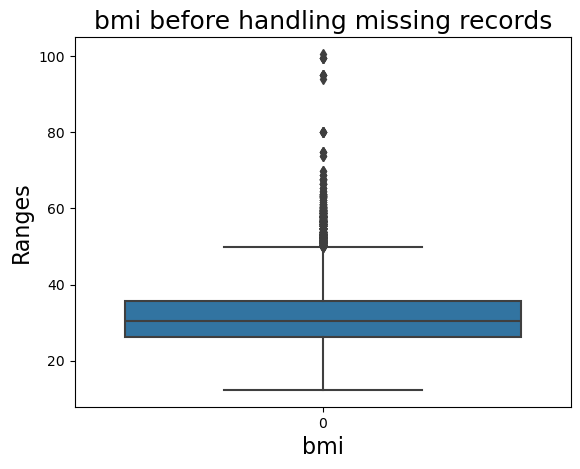

In [67]:

plt.title('bmi before handling missing records', fontsize=18)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('bmi', fontsize=16)
sns.boxplot(df1['bmi'])
plt.show()

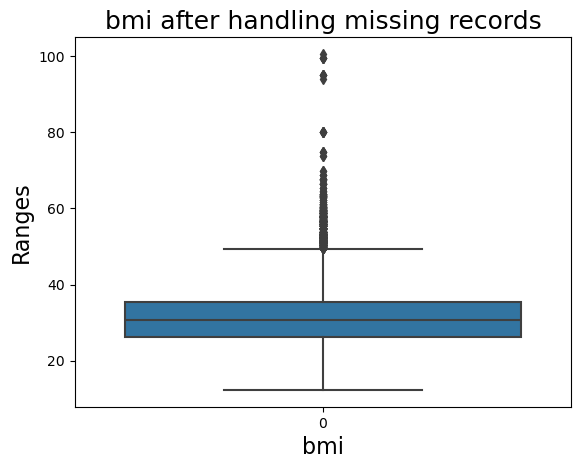

In [68]:
plt.title('bmi after handling missing records', fontsize=18)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('bmi', fontsize=16)
sns.boxplot(inverse_scaled_data['bmi'])
plt.show()

The above two box plot indicates the range of data before imputing the missing values and after imputing the missing values respectively. There is no/less changes indicating less/no changes in the statistical aspect of the variable

## Outliers Treatment

In [69]:
df3 = pd.concat([inverse_scaled_data, y], axis=1)

In [70]:
outlier_var = df3[['daily_avg_steps', 'bmi']]

In [71]:
outlier_var

daily_avg_steps    bmi
0               4866.0  31.20
1               6411.0  34.20
2               4509.0  40.40
3               6214.0  22.90
4               4938.0  26.50
...                ...    ...
24995           5614.0  36.10
24996           4719.0  31.30
24997           5624.0  38.34
24998          10777.0  26.60
24999           5882.0  41.60

[25000 rows x 2 columns]

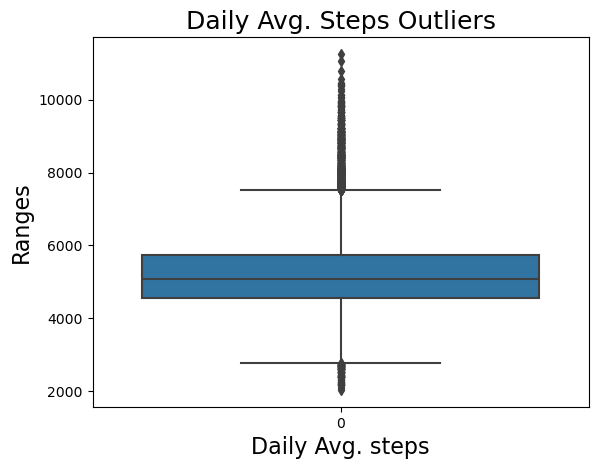

In [72]:
sns.boxplot(df3['daily_avg_steps'])
plt.title('Daily Avg. Steps Outliers', fontsize=18)
plt.ylabel('Ranges', fontsize=16)
plt.xlabel('Daily Avg. steps', fontsize=16)
plt.show()

In [73]:
# Outlier
Q1 = outlier_var.quantile(0.25)
Q3 = outlier_var.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [74]:
((outlier_var > UL) | (outlier_var < LL)).sum()

daily_avg_steps    952
bmi                577
dtype: int64

In [75]:
outlier_var[((outlier_var > UL) | (outlier_var < LL))]= np.nan

In [76]:
outlier_var.isnull().sum()

daily_avg_steps    952
bmi                577
dtype: int64

In [77]:
df4 = df3.drop(['bmi', 'daily_avg_steps'], axis=1)
df4 = pd.concat([df4, outlier_var], axis=1)
df4 = df4.reset_index(drop=True)

In [78]:
df4

Occupation_Salried  Occupation_Student  cholesterol_level  Alcohol  \
0                     1.0                 0.0                0.0      1.0   
1                     0.0                 1.0                1.0      1.0   
2                     0.0                 0.0                3.0      2.0   
3                     0.0                 0.0                2.0      1.0   
4                     0.0                 1.0                1.0      0.0   
...                   ...                 ...                ...      ...   
24995                 1.0                 0.0                4.0      1.0   
24996                 0.0                 0.0                3.0      1.0   
24997                 0.0                 1.0                1.0      1.0   
24998                 1.0                 0.0                4.0      1.0   
24999                 0.0                 0.0                1.0      0.0   

       exercise  years_of_insurance_with_us  regular_checkup_lasy_year  \
0           1.0                         3.0                        1.0   
1           1.0                         0.0                        0.0   
2           2.0                         1.0                        0.0   
3           0.0                         7.0                        4.0   
4           2.0                         3.0                        1.0   
...         ...                         ...                        ...   
24995       1.0                         3.0                        0.0   
24996       1.0                         6.0                        0.0   
24997       1.0                         7.0                        0.0   
24998       1.0                         1.0                        0.0   
24999       0.0                         8.0                        2.0   

       adventure_sports  visited_doctor_last_1_year   age  ...  \
0                     1                         2.0  28.0  ...   
1                     0                         4.0  50.0  ...   
2                     0                         4.0  68.0  ...   
3                     0                         2.0  51.0  ...   
4                     0                         2.0  44.0  ...   
...                 ...                         ...   ...  ...   
24995                 0                         4.0  22.0  ...   
24996                 0                         4.0  58.0  ...   
24997                 1                         2.0  34.0  ...   
24998                 0                         2.0  27.0  ...   
24999                 0                         4.0  22.0  ...   

       Location_Kolkata  Location_Lucknow  Location_Mangalore  \
0                   0.0               0.0                 0.0   
1                   0.0               0.0                 0.0   
2                   0.0               0.0                 0.0   
3                   0.0               0.0                 0.0   
4                   0.0               0.0                 0.0   
...                 ...               ...                 ...   
24995               0.0               0.0                 0.0   
24996               0.0               0.0                 0.0   
24997               0.0               0.0                 0.0   
24998               0.0               0.0                 0.0   
24999               0.0               0.0                 0.0   

       Location_Mumbai  Location_Nagpur  Location_Pune  Location_Surat  \
0                  0.0              0.0            0.0             0.0   
1                  0.0              0.0            0.0             0.0   
2                  0.0              0.0            0.0             0.0   
3                  0.0              0.0            0.0             0.0   
4                  0.0              0.0            0.0             0.0   
...                ...              ...            ...             ...   
24995              0.0              0.0            0.0             0.0   
24996              0.0     

In [79]:
X = df4.drop('insurance_cost', axis=1)
y = df4['insurance_cost']

In [80]:
sc = StandardScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_scaled = X_scaled.reset_index(drop=True)

In [81]:
KNNimputerModel = KNNImputer(n_neighbors=5)

X_scaled_imputed = pd.DataFrame(KNNimputerModel.fit_transform(X_scaled), columns = X_scaled.columns)
X_scaled_imputed = X_scaled_imputed.reset_index(drop=True)

In [82]:
inverse_scaled_data = pd.DataFrame(sc.inverse_transform(X_scaled_imputed), columns = X_scaled_imputed.columns)
inverse_scaled_data = inverse_scaled_data.reset_index(drop=True)
inverse_scaled_data['adventure_sports'] = inverse_scaled_data['adventure_sports'].apply(lambda x: 0 if x < 1 else 1)
inverse_scaled_data.head()

Occupation_Salried  Occupation_Student  cholesterol_level  Alcohol  \
0                 1.0                 0.0                0.0      1.0   
1                 0.0                 1.0                1.0      1.0   
2                 0.0                 0.0                3.0      2.0   
3                 0.0                 0.0                2.0      1.0   
4                 0.0                 1.0                1.0      0.0   

   exercise  years_of_insurance_with_us  regular_checkup_lasy_year  \
0       1.0                         3.0                        1.0   
1       1.0                         0.0                        0.0   
2       2.0                         1.0                        0.0   
3       0.0                         7.0                        4.0   
4       2.0                         3.0                        1.0   

   adventure_sports  visited_doctor_last_1_year   age  ...  Location_Kanpur  \
0                 1                         2.0  28.0  ...              0.0   
1                 0                         4.0  50.0  ...              0.0   
2                 0                         4.0  68.0  ...              0.0   
3                 0                         2.0  51.0  ...              0.0   
4                 0                         2.0  44.0  ...              0.0   

   Location_Kolkata  Location_Lucknow  Location_Mangalore  Location_Mumbai  \
0               0.0               0.0                 0.0              0.0   
1               0.0               0.0                 0.0              0.0   
2               0.0               0.0                 0.0              0.0   
3               0.0               0.0                 0.0              0.0   
4               0.0               0.0                 0.0              0.0   

   Location_Nagpur  Location_Pune  Location_Surat  daily_avg_steps   bmi  
0              0.0            0.0             0.0           4866.0  31.2  
1              0.0            0.0             0.0           6411.0  34.2  
2              0.0            0.0             0.0           4509.0  40.4  
3              0.0            0.0             0.0           6214.0  22.9  
4              0.0            0.0             0.0           4938.0  26.5  

[5 rows x 35 columns]

In [83]:
df5 = pd.concat([inverse_scaled_data, y], axis=1)
df5['insurance_cost'] = pd.to_numeric(df5['insurance_cost'], errors='coerce').astype('Int64')

In [84]:
# df5.to_excel('Clean_data.xlsx', index=False)

# Clustering Analysis

In [85]:
data = pd.read_excel('Clean_data.xlsx')

In [86]:
data1 = data[['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'insurance_cost']]

In [87]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)
data_scaled.head()

daily_avg_steps       age  avg_glucose_level       bmi    weight  \
0        -0.290211 -1.050360          -1.124370  0.050638 -0.494422   
1         1.513338  0.315492           0.708929  0.499628 -1.459569   
2        -0.706953  1.433007          -0.024391  1.427541  0.149010   
3         1.283371  0.377576          -0.933069 -1.191568 -0.065467   
4        -0.206162 -0.057013          -0.789594 -0.652780  0.256249   

   insurance_cost  
0       -0.430722  
1       -1.464554  
2        0.086194  
3        0.000041  
4        0.172347

In [88]:
data_scaled_copy = data_scaled.copy()

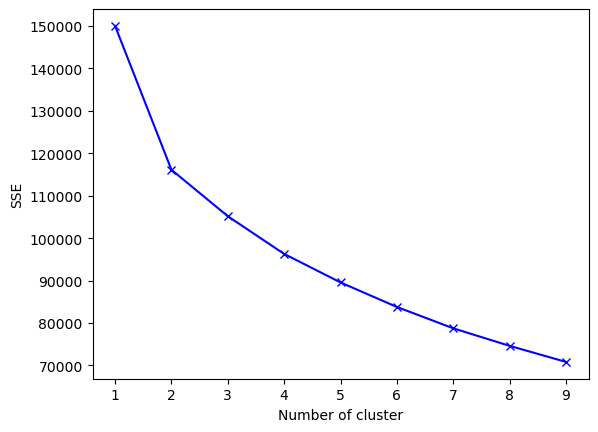

In [89]:
#Empty dictionary to store the SSE for each value of k
sse = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

**Observations:**

- We can see from the plot that there is a consistent dip from 2 to 9 and there doesn't seem to be a clear 'elbow' here. We may chose any from 2 to 8 as our # of clusters.
- So, let's look at another method to get a 'second opinion from maths'. Let's create a plot with Silhouette scores to see how it varies with k.

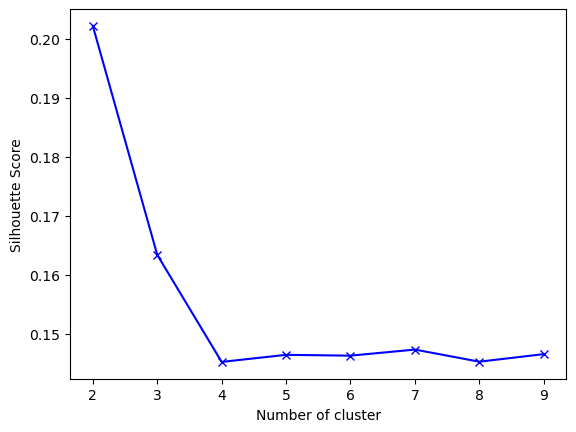

In [90]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

**Observations:**

- We can see from the plot that silhouette score is highest for k=2. Well that makes it slightly easy for us and we can start with first understanding these 2 clusters. So let's take the number of clusters as 2.

In [91]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data
# data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [92]:
data['KMeans_Labels'].value_counts()

KMeans_Labels
1    12778
0    12222
Name: count, dtype: int64

In [93]:
# data.to_excel("Clustered_data.xlsx", index=False)

## Analysis

In [94]:
df = pd.read_excel('Clustered_data.xlsx')

In [95]:
data = df[['age', 'avg_glucose_level', 'weight', 'fat_percentage', 'daily_avg_steps', 'bmi', 'insurance_cost', 'KMeans_Labels']]
data.head()

age  avg_glucose_level  weight  fat_percentage  daily_avg_steps   bmi  \
0   28                 97      67              25           4866.0  31.2   
1   50                212      58              27           6411.0  34.2   
2   68                166      73              32           4509.0  40.4   
3   51                109      71              37           6214.0  22.9   
4   44                118      74              34           4938.0  26.5   

   insurance_cost  KMeans_Labels  
0           20978              0  
1            6170              0  
2           28382              1  
3           27148              0  
4           29616              1

In [96]:
#Calculating mean and median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
df_kmeans.T

group_0 Mean  group_1 Mean  group_0 Median  group_1 Median
age                   44.713176     45.114915            44.0            45.0
avg_glucose_level    168.475069    166.624315           169.0           166.0
weight                63.750777     79.142645            64.0            78.0
fat_percentage        28.877391     28.749883            31.0            30.0
daily_avg_steps     5198.646085   5194.060207          5087.5          5084.0
bmi                   31.374958     31.284916            30.7            30.5
insurance_cost     15131.478666  38662.594548         14808.0         37020.0

### The key takeaway from the table is the average and median of insurance_cost and weight.

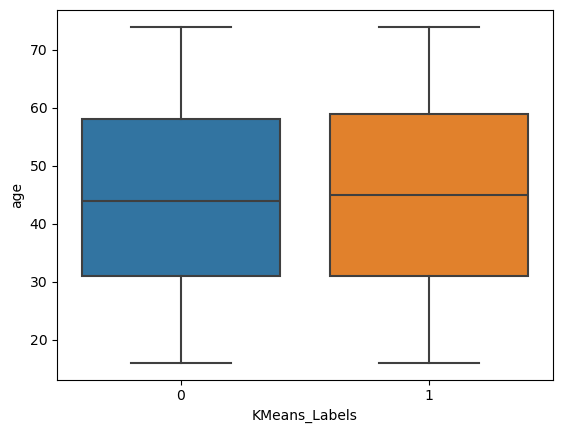

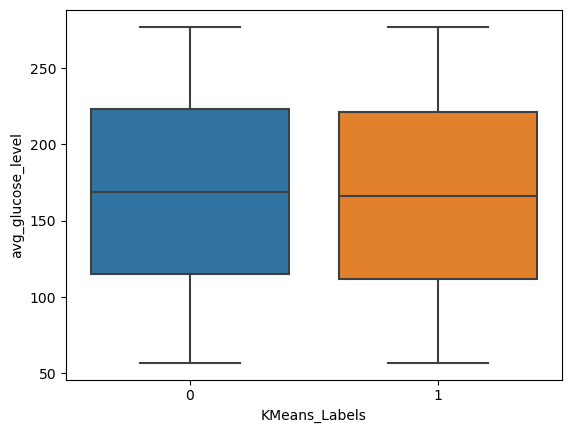

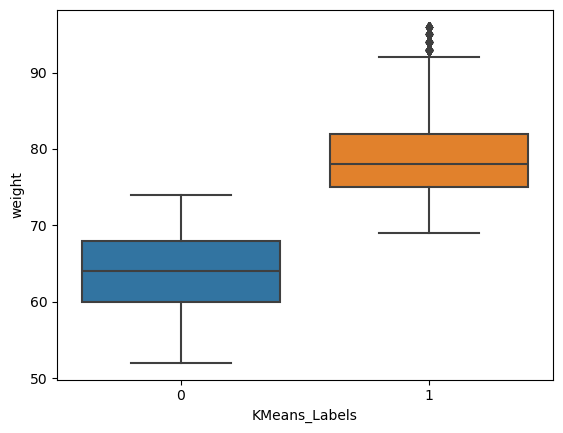

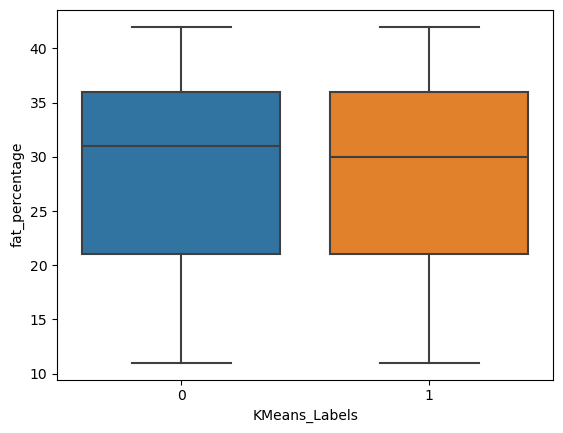

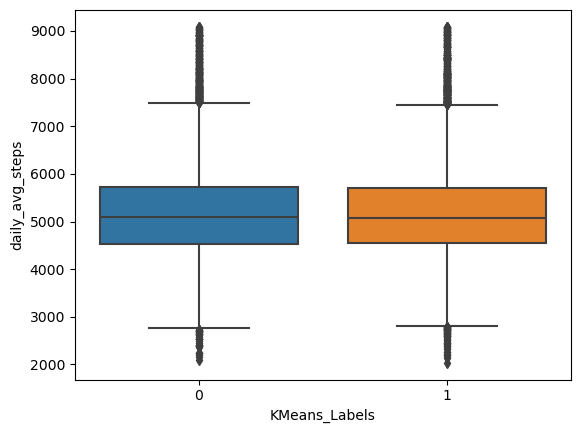

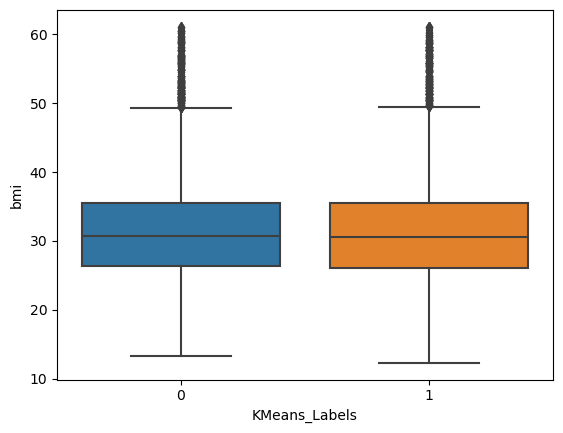

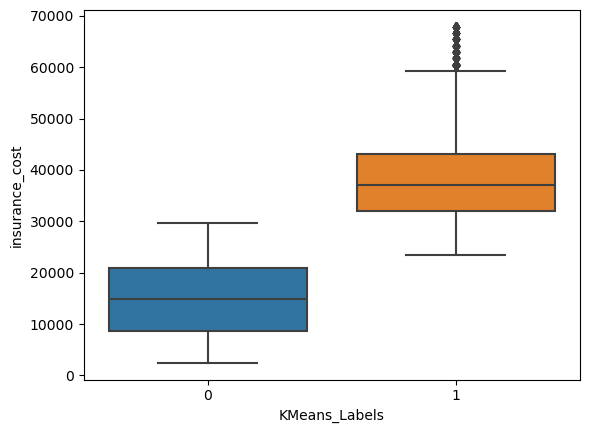

In [97]:
cols_visualise = ['age', 'avg_glucose_level', 'weight', 'fat_percentage', 'daily_avg_steps', 'bmi', 'insurance_cost']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

# Model Building

In [98]:
df = pd.read_excel('Clean_data.xlsx')
df

Occupation_Salried  Occupation_Student  cholesterol_level  Alcohol  \
0                       1                   0                  0        1   
1                       0                   1                  1        1   
2                       0                   0                  3        2   
3                       0                   0                  2        1   
4                       0                   1                  1        0   
...                   ...                 ...                ...      ...   
24995                   1                   0                  4        1   
24996                   0                   0                  3        1   
24997                   0                   1                  1        1   
24998                   1                   0                  4        1   
24999                   0                   0                  1        0   

       exercise  years_of_insurance_with_us  regular_checkup_lasy_year  \
0             1                           3                          1   
1             1                           0                          0   
2             2                           1                          0   
3             0                           7                          4   
4             2                           3                          1   
...         ...                         ...                        ...   
24995         1                           3                          0   
24996         1                           6                          0   
24997         1                           7                          0   
24998         1                           1                          0   
24999         0                           8                          2   

       adventure_sports  visited_doctor_last_1_year  age  ...  \
0                     1                           2   28  ...   
1                     0                           4   50  ...   
2                     0                           4   68  ...   
3                     0                           2   51  ...   
4                     0                           2   44  ...   
...                 ...                         ...  ...  ...   
24995                 0                           4   22  ...   
24996                 0                           4   58  ...   
24997                 1                           2   34  ...   
24998                 0                           2   27  ...   
24999                 0                           4   22  ...   

       Location_Kolkata  Location_Lucknow  Location_Mangalore  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   0   
3                     0                 0                   0   
4                     0                 0                   0   
...                 ...               ...                 ...   
24995                 0                 0                   0   
24996                 0                 0                   0   
24997                 0                 0                   0   
24998                 0                 0                   0   
24999                 0                 0                   0   

       Location_Mumbai  Location_Nagpur  Location_Pune  Location_Surat  \
0                    0                0              0               0   
1                    0                0              0               0   
2                    0                0              0               0   
3                    0                0              0               0   
4                    0                0              0               0   
...                ...              ...            ...             ...   
24995                0                0              0               0   
24996                0                0

## Basic Ordinary Least Squared(Linear Regression) Model Building

In [99]:
X = df.drop(['insurance_cost'], axis=1)
y = df['insurance_cost']

In [100]:
# let's add the intercept to data
X = sm.add_constant(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
olsmod = sm.OLS(y_train, X_train)
ols = olsmod.fit()

# Model-1

In [104]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     9304.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:05:33   Log-Likelihood:            -1.7876e+05
No. Observations:               18750   AIC:                         3.576e+05
Df Residuals:                   18714   BIC:                         3.579e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# VIF Check

In [105]:
if isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled_df = X_train_scaled
else:
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calculate VIF values
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X_train_scaled_df.shape[1])],
    index=X_train_scaled_df.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                                  NaN
Occupation_Salried                1.314709
Occupation_Student                1.642167
cholesterol_level                 1.425725
Alcohol                           1.021919
exercise                          1.014815
years_of_insurance_with_us        1.598195
regular_checkup_lasy_year         1.192900
adventure_sports                  1.008306
visited_doctor_last_1_year        1.038151
age                               1.002025
heart_decs_history                1.021793
other_major_decs_history          1.051805
Gender                            1.191267
avg_glucose_level                 1.001959
Year_last_admitted                1.738491
weight                            1.219255
covered_by_any_other_company      1.089913
weight_change_in_last_one_year    1.172687
fat_percentage                    1.099683
Location_Bangalore                1.917865
Location_Bhubaneswar              1.876517
Location_Chennai                  1.8646

In [106]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = ols.fittedvalues.values  # predicted values
df_pred["Residuals"] = ols.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values    Residuals
0          25914   23794.455478  2119.544522
1           4936    6633.078918 -1697.078918
2          32084   34916.653442 -2832.653442
3          22212   26208.614819 -3996.614819
4          48126   49922.876123 -1796.876123

In [107]:
# Predictions
y_pred = ols.predict(X_test_scaled)

# Check RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

3343.4847328379756

In [108]:
# Check RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

30011.39047458097

In [109]:
# check the MAPE on the train data
mape1 = mean_absolute_percentage_error(y_train, df_pred["Fitted Values"])
mape1

0.15202108112564663

In [110]:
# check the MAE on the test data
mape2 = mean_absolute_percentage_error(y_test, y_pred)
mape2

1.0634218260207238

## A remarkable sign that none of the features have high multicollinearity. It can be observed that all the features have VIF less than 2.

In [111]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = ols.fittedvalues.values  # predicted values
df_pred["Residuals"] = ols.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values    Residuals
0          25914   23794.455478  2119.544522
1           4936    6633.078918 -1697.078918
2          32084   34916.653442 -2832.653442
3          22212   26208.614819 -3996.614819
4          48126   49922.876123 -1796.876123

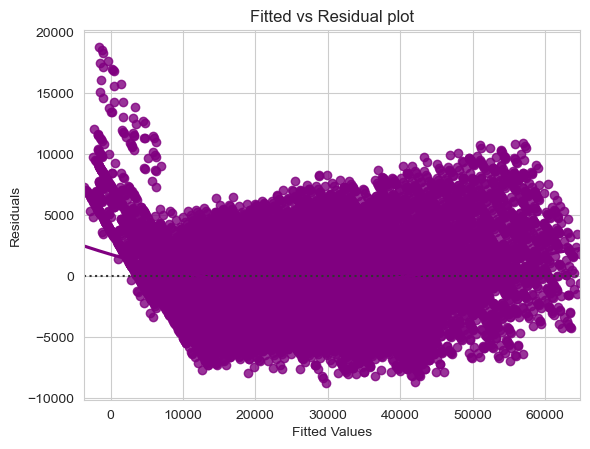

In [112]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

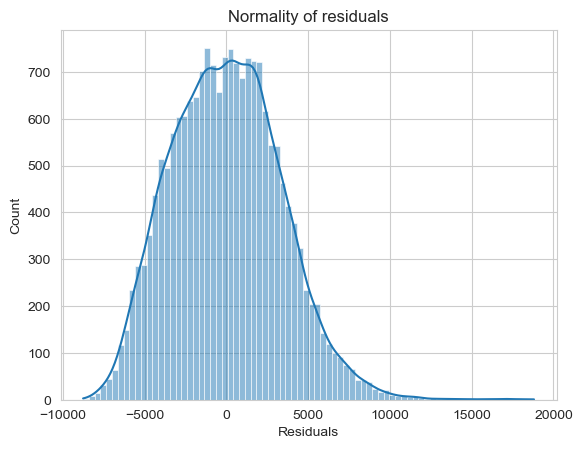

In [113]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

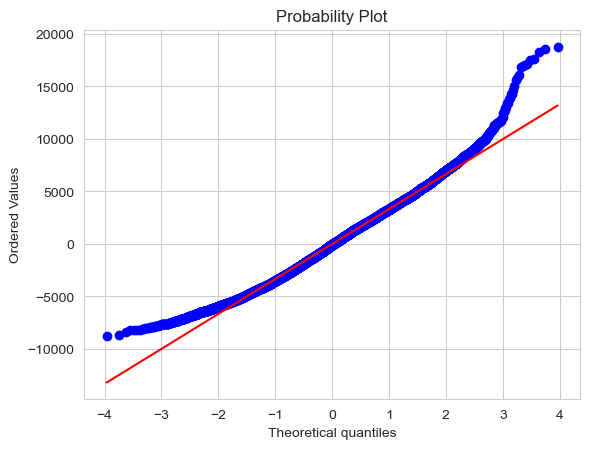

In [114]:
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [115]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9907143115997314, pvalue=8.195023518946873e-33)

In [116]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 0.9919235679672852), ('p-value', 0.6524045981425037)]

# Model-2

In [117]:
# X = df.drop(['insurance_cost', 'Alcohol', 'Gender', 'other_major_decs_history', 'Location_Count', 'fat_percentage', 'avg_glucose_level', 'cholesterol_level', 'Occupation_Student', 'bmi', 'exercise', 'daily_avg_steps'], axis=1)
# y = df['insurance_cost']

In [118]:
X = df.drop(['insurance_cost', 'Alcohol', 'bmi', 'other_major_decs_history', 'avg_glucose_level', 'Gender', 'fat_percentage', 'cholesterol_level', 'Occupation_Student', 'daily_avg_steps', 'exercise'], axis=1)
y = df['insurance_cost']

In [119]:
# let's add the intercept to data
# X = sm.add_constant(X)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [121]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [123]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [124]:
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [125]:
olsmod = sm.OLS(y_train, X_train_scaled)
ols = olsmod.fit()

In [126]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.303e+04
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:07:09   Log-Likelihood:            -1.7876e+05
No. Observations:               18750   AIC:                         3.576e+05
Df Residuals:                   18724   BIC:                         3.578e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [127]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = ols.fittedvalues.values  # predicted values
df_pred["Residuals"] = ols.resid.values  # residuals

df_pred.head()

Actual Values  Fitted Values    Residuals
0          25914   23795.741192  2118.258808
1           4936    6613.020815 -1677.020815
2          32084   34957.195884 -2873.195884
3          22212   26245.135841 -4033.135841
4          48126   49918.069667 -1792.069667

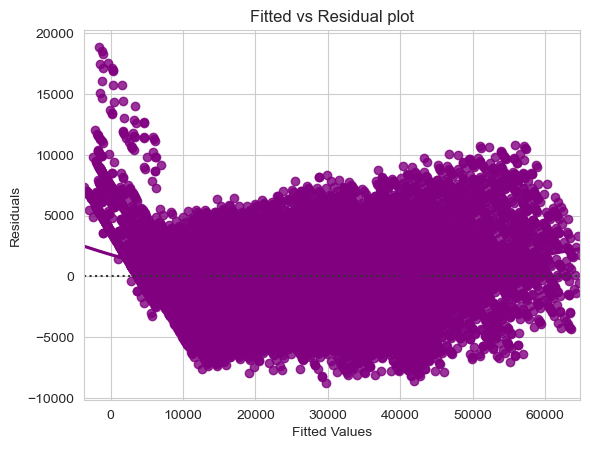

In [128]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

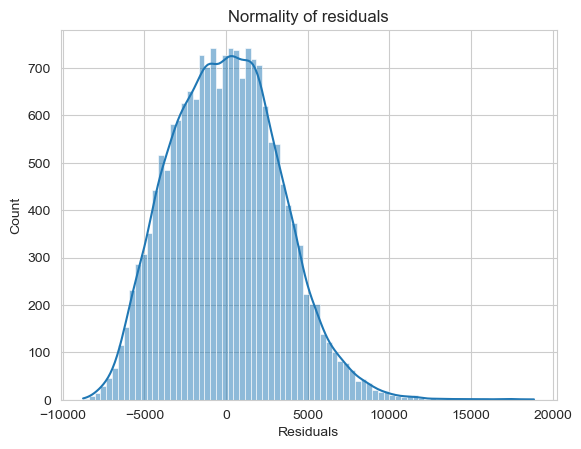

In [129]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

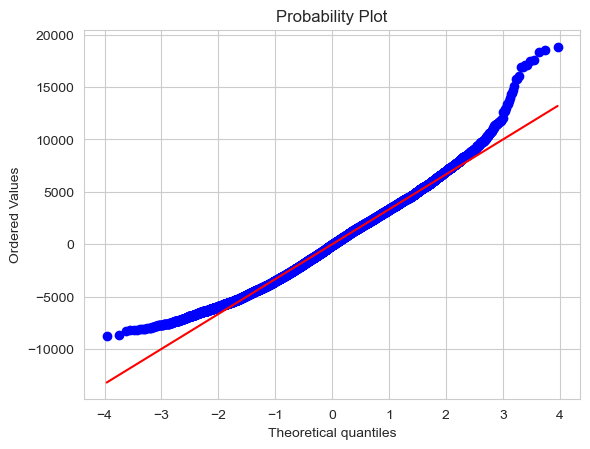

In [130]:
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [131]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9906660318374634, pvalue=6.92276688126871e-33)

In [132]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 0.9913036828348472), ('p-value', 0.6635874106938857)]

## Since p-value > 0.05 we can say that the residuals are homoscedastic.

# Prediction on test data

In [133]:
# Predictions
y_pred = ols.predict(X_test_scaled)

In [134]:
# Check RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

3344.092756925474

In [135]:
# Check RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

3394.5071680745646

In [136]:
# check the MAE on the train data
mape1 = mean_absolute_percentage_error(y_train, df_pred["Fitted Values"])
mape1

0.15207223112820234

In [137]:
# check the MAE on the test data
mape2 = mean_absolute_percentage_error(y_test, y_pred)
mape2

0.1536165229674894

In [138]:
y_test

0        8638
1       12340
2       33318
3       34552
4       20978
        ...  
6245    60466
6246     7404
6247    11106
6248    27148
6249     7404
Name: insurance_cost, Length: 6250, dtype: int64

In [139]:
y_pred_rounded = [round(val) for val in y_pred]
act_pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rounded})

In [140]:
act_pred_df = act_pred_df.reset_index(drop=True)

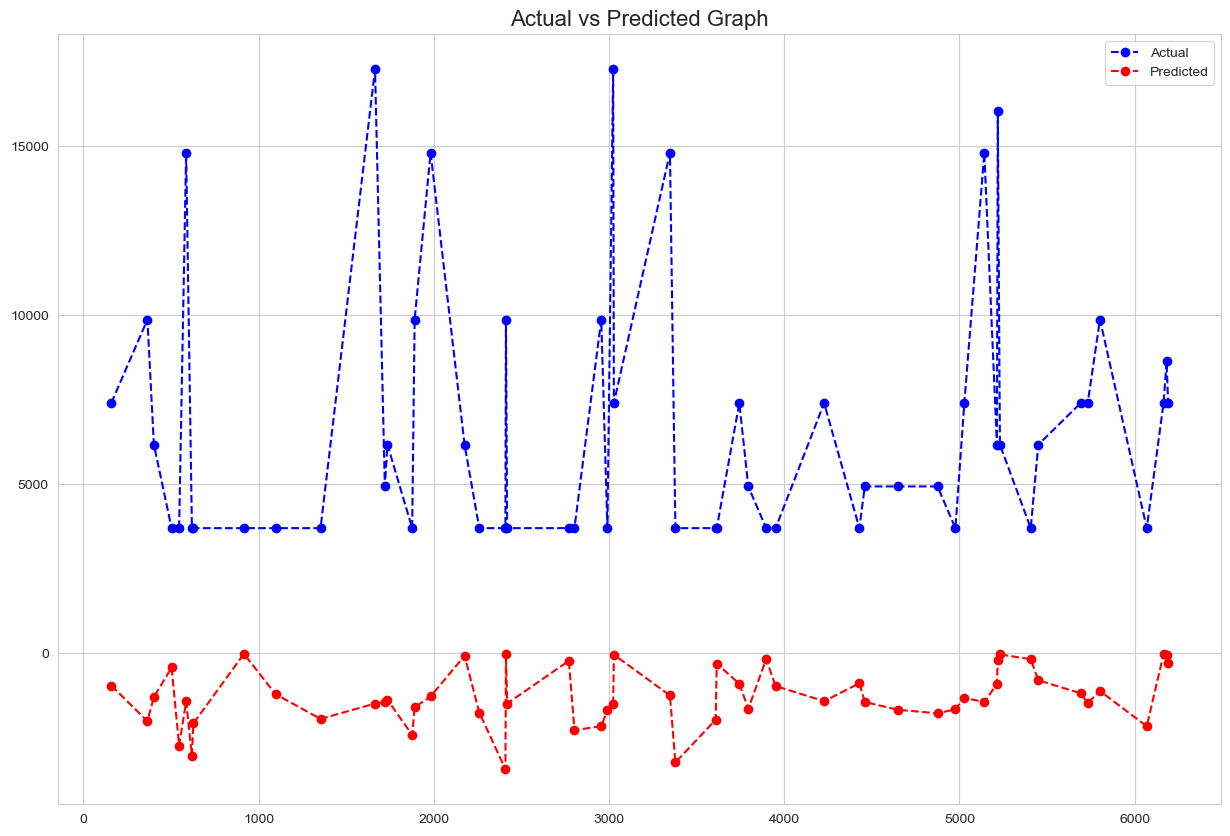

In [141]:
# 56 records have values <= 0
# act_pred_df['Actual'].loc[act_pred_df['Predicted'] <= 0]
plt.figure(figsize=(15,10))
plt.plot(act_pred_df['Actual'].loc[act_pred_df['Predicted'] <= 0], "c--o", label = "Actual ", c='blue')
plt.plot(act_pred_df['Predicted'].loc[act_pred_df['Predicted'] <= 0], "m--o", label = "Predicted", c='Red')
plt.title("Actual vs Predicted Graph", fontsize=16)
plt.legend()
plt.show()

# Regularization

## Ridge Regression

In [142]:
X = df.drop('insurance_cost', axis=1)
y = df['insurance_cost']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [144]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define a range of alpha values to try
ridge_param_grid = {'ridge__alpha': np.logspace(-4, 4, 9)}

# Use GridSearchCV for Ridge regression
ridge_grid_search = GridSearchCV(ridge_pipeline, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='neg_mean_squared_error')

In [145]:
print("Best alpha for Ridge: {}".format(ridge_grid_search.best_params_['ridge__alpha']))

Best alpha for Ridge: 1.0


In [146]:
best_alpha = ridge_grid_search.best_params_['ridge__alpha']
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

Ridge()

In [147]:
y_train_pred = ridge_model.predict(X_train)

In [148]:
y_test_pred = ridge_model.predict(X_test)

In [149]:
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.9457944917238656
0.9433873253046343


In [150]:
rmse1 = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("The Root Mean Squared Error on Train Set: {}".format(rmse1))

The Root Mean Squared Error on Train Set: 3337.4023276592093


In [151]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("The Root Mean Squared Error on Test Set: {}".format(rmse2))

The Root Mean Squared Error on Test Set: 3401.779259186506


In [152]:
mape = mean_absolute_percentage_error(y_train, y_train_pred)
mape

0.15121675739521573

In [153]:
mape2 = mean_absolute_percentage_error(y_test, y_test_pred)
mape2

0.1555253292737454

In [154]:
y_pred_rounded_ridge = [round(val) for val in y_test_pred]
act_pred_ridge_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rounded_ridge})

In [155]:
act_pred_ridge_df = act_pred_ridge_df.reset_index(drop=True)

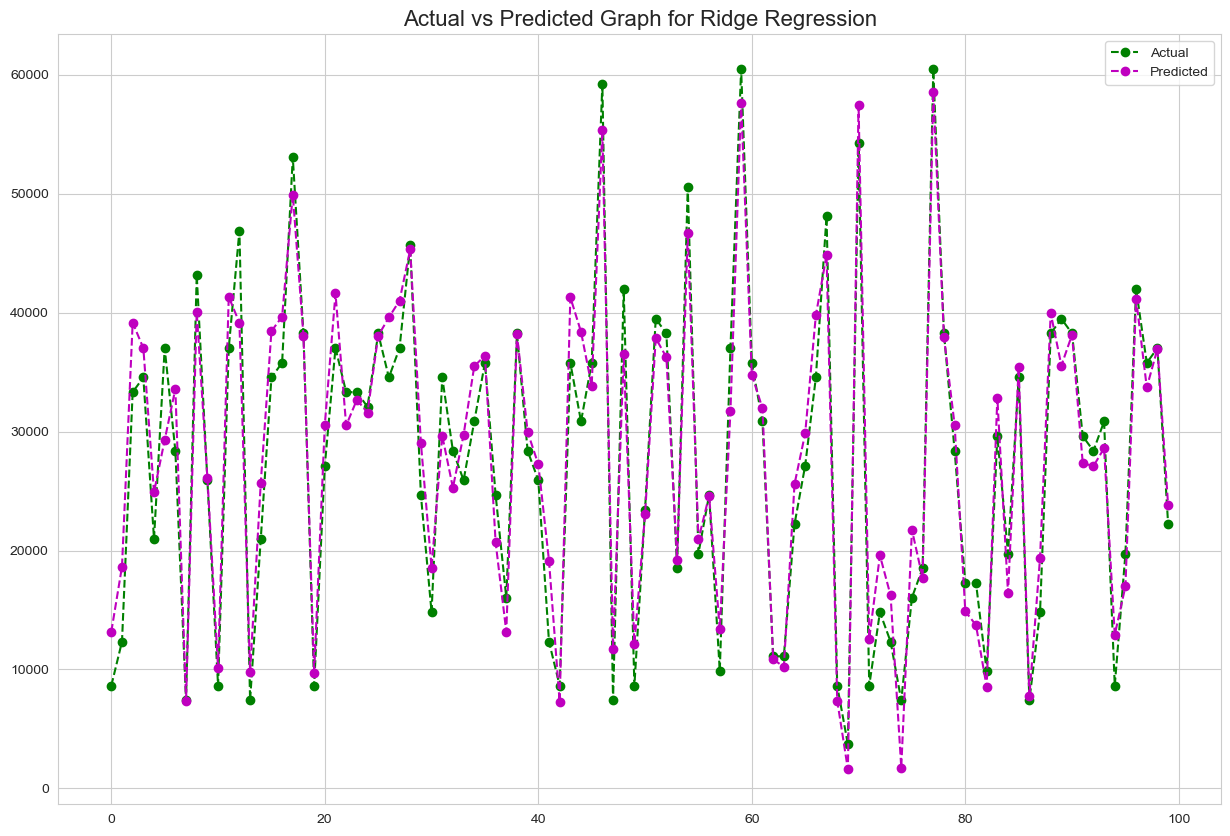

In [156]:
plt.figure(figsize=(15,10))
plt.plot(act_pred_ridge_df['Actual'][0:100], "c--o", label = "Actual ", c='green')
plt.plot(act_pred_ridge_df['Predicted'][0:100], "m--o", label = "Predicted", c='m')
plt.title("Actual vs Predicted Graph for Ridge Regression", fontsize=16)
plt.legend()
plt.show()

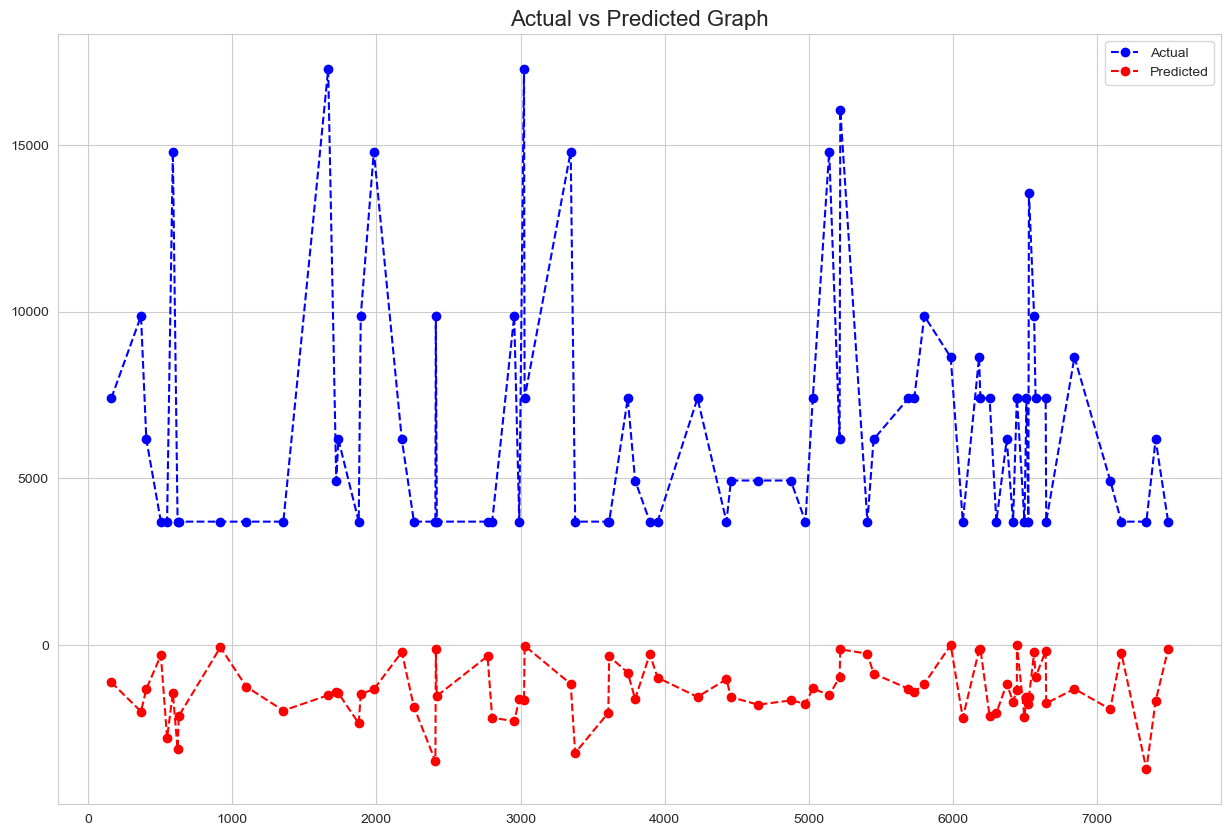

In [157]:
# 75 records have values <= 0
# act_pred_ridge_df['Actual'].loc[act_pred_ridge_df['Predicted'] <= 0]
plt.figure(figsize=(15,10))
plt.plot(act_pred_ridge_df['Actual'].loc[act_pred_ridge_df['Predicted'] <= 0], "c--o", label = "Actual ", c='blue')
plt.plot(act_pred_ridge_df['Predicted'].loc[act_pred_ridge_df['Predicted'] <= 0], "m--o", label = "Predicted", c='Red')
plt.title("Actual vs Predicted Graph", fontsize=16)
plt.legend()
plt.show()

# Ridge Alternate

In [158]:
# # Define the parameter grid for Ridge
# ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}

# # Initialize the Ridge model
# ridge = Ridge()

# # Initialize GridSearchCV
# ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

# # Scale the feature variables
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Fit the GridSearchCV to the training data
# ridge_grid_search.fit(X_train_scaled, y_train)

# # Get the best model and its parameters
# best_ridge = ridge_grid_search.best_estimator_
# print("Best Ridge alpha:", ridge_grid_search.best_params_)

# # Predict and evaluate using the best model
# y_pred_train = best_ridge.predict(X_train_scaled)
# y_pred_test = best_ridge.predict(X_test_scaled)

# print("Best Ridge Regression:")
# print("Train MSE:",np.sqrt(mean_squared_error(y_train, y_pred_train)))
# print("Test MSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
# print("Train R²:", r2_score(y_train, y_pred_train))
# print("Test R²:", r2_score(y_test, y_pred_test))

## Lasso Regression

In [159]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define a range of alpha values to try
lasso_param_grid = {'lasso__alpha': np.logspace(-4, 4, 9)}

# Use GridSearchCV for Ridge regression
lasso_grid_search = GridSearchCV(lasso_pipeline, param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='neg_mean_squared_error')

In [160]:
print("Best alpha for Lasso: {}".format(lasso_grid_search.best_params_['lasso__alpha']))

Best alpha for Lasso: 0.1


In [161]:
best_alpha = lasso_grid_search.best_params_['lasso__alpha']
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [162]:
y_train_pred = lasso_model.predict(X_train)

In [163]:
y_test_pred = lasso_model.predict(X_test)

In [164]:
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.9457943324361708
0.943390772568028


## rmse1 = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("The Root Mean Squared Error on Train Set: {}".format(rmse1))

In [165]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("The Root Mean Squared Error on Test Set: {}".format(rmse2))

The Root Mean Squared Error on Test Set: 3401.675686906098


In [166]:
mape1 = mean_absolute_percentage_error(y_train, y_train_pred)
mape1

0.15122002498373271

In [167]:
mape2 = mean_absolute_percentage_error(y_test, y_test_pred)
mape2

0.15551984935927538

In [168]:
y_pred_rounded_lasso = [round(val) for val in y_test_pred]
act_pred_lasso_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rounded_lasso})

In [169]:
act_pred_lasso_df = act_pred_lasso_df.reset_index(drop=True)

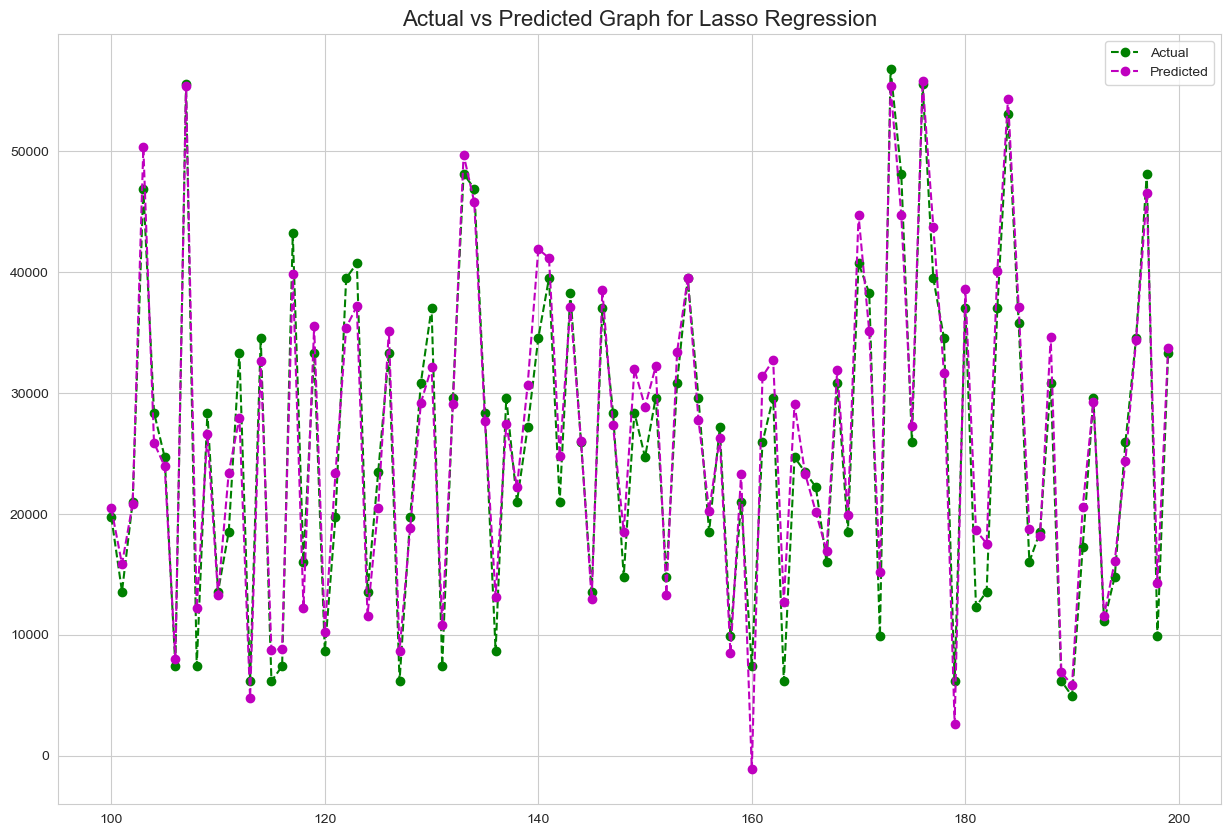

In [170]:
plt.figure(figsize=(15,10))
plt.plot(act_pred_lasso_df['Actual'][100:200], "c--o", label = "Actual ", c='green')
plt.plot(act_pred_lasso_df['Predicted'][100:200], "m--o", label = "Predicted", c='m')
plt.title("Actual vs Predicted Graph for Lasso Regression", fontsize=16)
plt.legend()
plt.show()

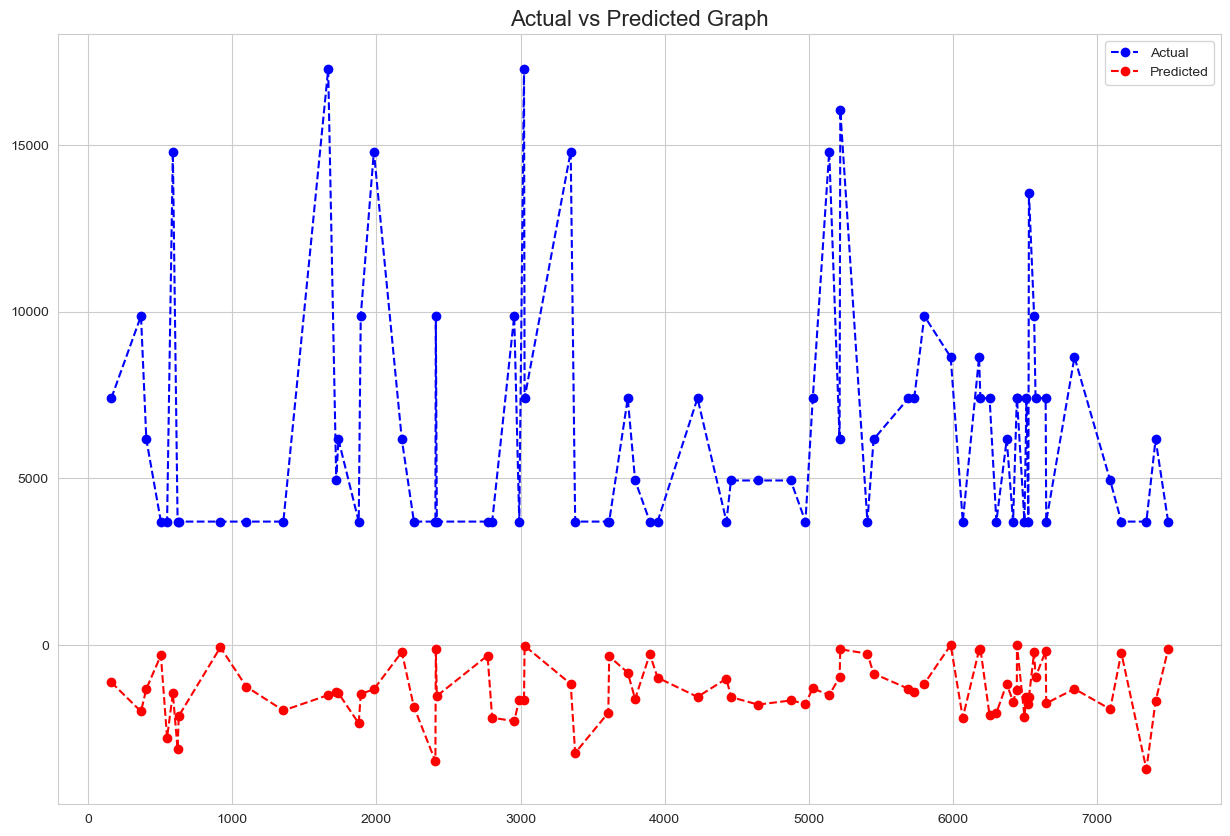

In [171]:
# 75 records have values <= 0
# act_pred_;asso_df['Actual'].loc[act_pred_lasso_df['Predicted'] <= 0]
plt.figure(figsize=(15,10))
plt.plot(act_pred_lasso_df['Actual'].loc[act_pred_lasso_df['Predicted'] <= 0], "c--o", label = "Actual ", c='blue')
plt.plot(act_pred_lasso_df['Predicted'].loc[act_pred_lasso_df['Predicted'] <= 0], "m--o", label = "Predicted", c='Red')
plt.title("Actual vs Predicted Graph", fontsize=16)
plt.legend()
plt.show()

## Elastic Net

In [172]:
elastic_net_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Initialize the Elastic Net model
elastic_net = ElasticNet()

# Initialize GridSearchCV
elastic_net_grid_search = GridSearchCV(estimator=elastic_net, param_grid=elastic_net_param_grid, cv=5, scoring='neg_mean_squared_error')

# Scale the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the GridSearchCV to the training data
elastic_net_grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_elastic_net = elastic_net_grid_search.best_estimator_
print("Best Elastic Net parameters:", elastic_net_grid_search.best_params_)

# Predict and evaluate using the best model
y_pred_train = best_elastic_net.predict(X_train_scaled)
y_pred_test = best_elastic_net.predict(X_test_scaled)

print("Best Elastic Net Regression:")
print("Train MSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test MSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print(mean_absolute_percentage_error(y_train, y_pred_train))
print(mean_absolute_percentage_error(y_test, y_pred_test))

Best Elastic Net parameters: {'alpha': 0.01, 'l1_ratio': 0.9}
Best Elastic Net Regression:
Train MSE: 3337.4371899962807
Test MSE: 3401.6261630747904
Train R²: 0.9457933592619175
Test R²: 0.9433924208647382
0.15116053861089376
0.15546624121704808


In [173]:
y_pred_rounded_elasticNet = [round(val) for val in y_pred_test]
act_pred_elasticnet = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rounded_elasticNet})

In [174]:
act_pred_elasticnet = act_pred_elasticnet.reset_index(drop=True)

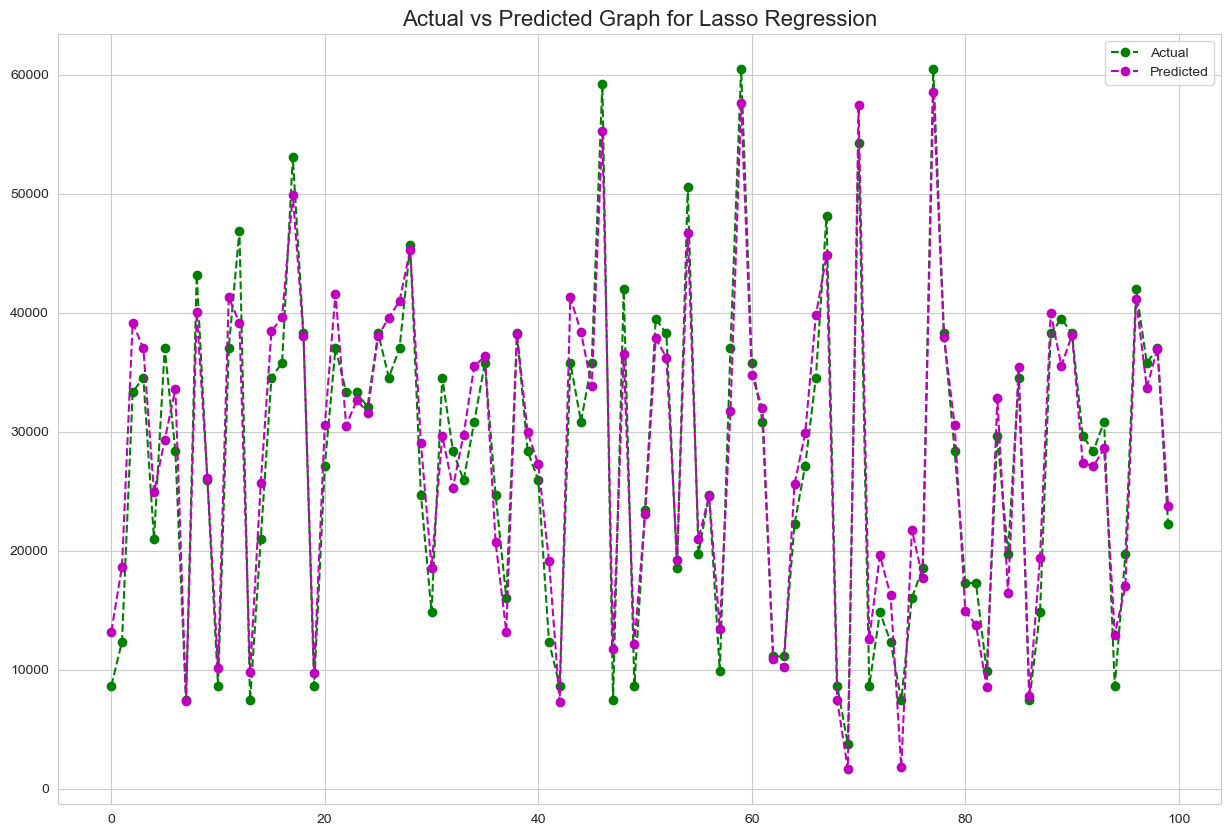

In [175]:
plt.figure(figsize=(15,10))
plt.plot(act_pred_elasticnet['Actual'][0:100], "c--o", label = "Actual ", c='green')
plt.plot(act_pred_elasticnet['Predicted'][0:100], "m--o", label = "Predicted", c='m')
plt.title("Actual vs Predicted Graph for Lasso Regression", fontsize=16)
plt.legend()
plt.show()

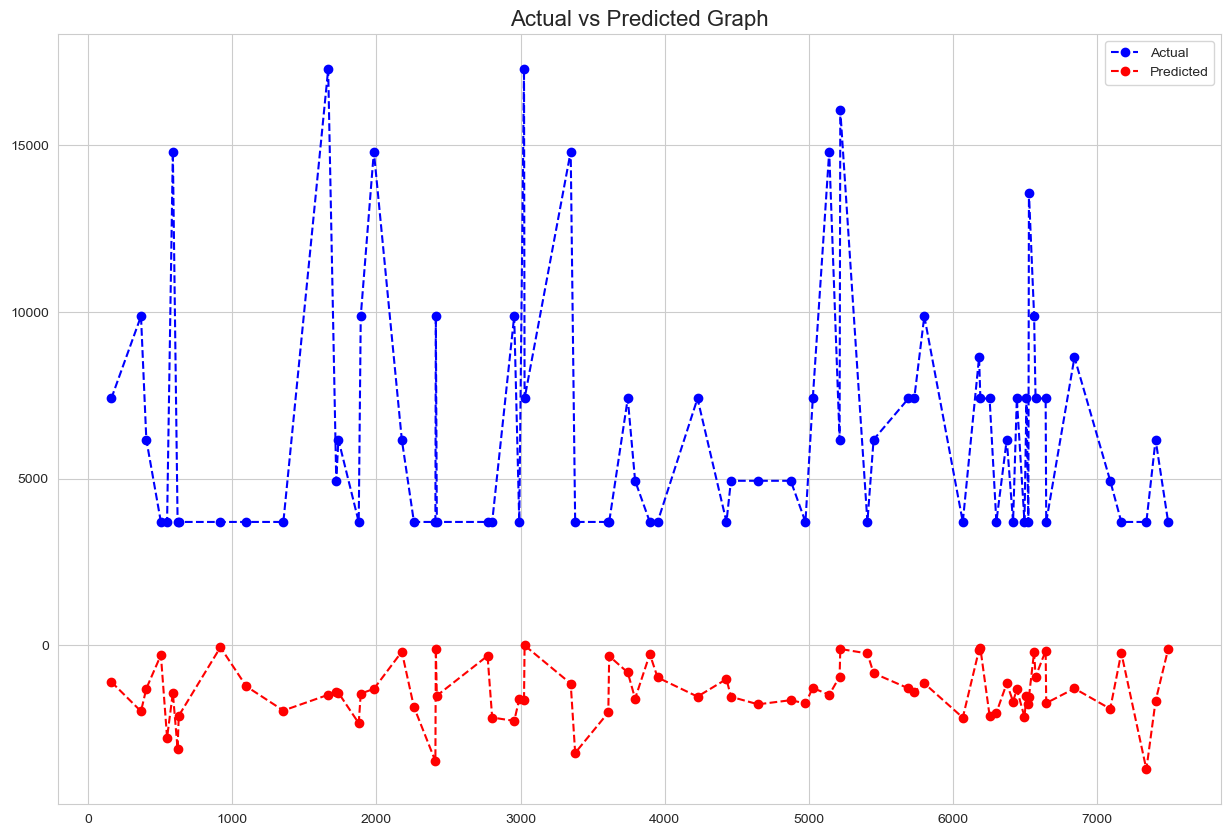

In [176]:
# 73 records have values <= 0
# act_pred_elasticnet['Actual'].loc[act_pred_elasticnet['Predicted'] <= 0]
plt.figure(figsize=(15,10))
plt.plot(act_pred_elasticnet['Actual'].loc[act_pred_elasticnet['Predicted'] <= 0], "c--o", label = "Actual ", c='blue')
plt.plot(act_pred_elasticnet['Predicted'].loc[act_pred_elasticnet['Predicted'] <= 0], "m--o", label = "Predicted", c='Red')
plt.title("Actual vs Predicted Graph", fontsize=16)
plt.legend()
plt.show()

# Tree Regressor Model Building (Decision trees, Random Forest, XGBoost and CatBoost)

In [177]:
df = pd.read_excel('Clean_data.xlsx')
df

Occupation_Salried  Occupation_Student  cholesterol_level  Alcohol  \
0                       1                   0                  0        1   
1                       0                   1                  1        1   
2                       0                   0                  3        2   
3                       0                   0                  2        1   
4                       0                   1                  1        0   
...                   ...                 ...                ...      ...   
24995                   1                   0                  4        1   
24996                   0                   0                  3        1   
24997                   0                   1                  1        1   
24998                   1                   0                  4        1   
24999                   0                   0                  1        0   

       exercise  years_of_insurance_with_us  regular_checkup_lasy_year  \
0             1                           3                          1   
1             1                           0                          0   
2             2                           1                          0   
3             0                           7                          4   
4             2                           3                          1   
...         ...                         ...                        ...   
24995         1                           3                          0   
24996         1                           6                          0   
24997         1                           7                          0   
24998         1                           1                          0   
24999         0                           8                          2   

       adventure_sports  visited_doctor_last_1_year  age  ...  \
0                     1                           2   28  ...   
1                     0                           4   50  ...   
2                     0                           4   68  ...   
3                     0                           2   51  ...   
4                     0                           2   44  ...   
...                 ...                         ...  ...  ...   
24995                 0                           4   22  ...   
24996                 0                           4   58  ...   
24997                 1                           2   34  ...   
24998                 0                           2   27  ...   
24999                 0                           4   22  ...   

       Location_Kolkata  Location_Lucknow  Location_Mangalore  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   0   
3                     0                 0                   0   
4                     0                 0                   0   
...                 ...               ...                 ...   
24995                 0                 0                   0   
24996                 0                 0                   0   
24997                 0                 0                   0   
24998                 0                 0                   0   
24999                 0                 0                   0   

       Location_Mumbai  Location_Nagpur  Location_Pune  Location_Surat  \
0                    0                0              0               0   
1                    0                0              0               0   
2                    0                0              0               0   
3                    0                0              0               0   
4                    0                0              0               0   
...                ...              ...            ...             ...   
24995                0                0              0               0   
24996                0                0

# Decision Tree regressor

In [178]:
X = df.drop(['insurance_cost'], axis=1)
y = df['insurance_cost']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [180]:
# X_train['other_major_decs_history'].value_counts()

### Heart and other major disease history were observed to have been undersampled. However the undersampled values have been equally distributed along train and test.

In [181]:
dtr = DecisionTreeRegressor(random_state=7)

In [182]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=7)

In [183]:
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

## Model Evaluation

### Training

In [184]:
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

print(f'Training R^2 Score: {r2_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training MAPE: {mape_train}')

Training R^2 Score: 1.0
Training RMSE: 0.0
Training MAPE: 0.0


### Testing

In [185]:
# Evaluate the model on testing data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Testing R^2 Score: {r2_test}')
print(f'Testing RMSE: {rmse_test}')
print(f'Testing MAPE: {mape_test}')

Testing R^2 Score: 0.9080585280218643
Testing RMSE: 4325.947121341175
Testing MAPE: 0.15899075559650547


### Observation: Overfitting model
### Solution: Hyper-tune parameters

In [186]:
# Hyper parameters range intialization for tuning

param_grid={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [187]:
dt_regressor = DecisionTreeRegressor(random_state=7)

# Perform GridSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=dt_regressor,param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)

### Uncomment this to train using hyper parameter tuning and identifying best parameters

In [188]:
# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

In [189]:
best_model = DecisionTreeRegressor(random_state=7, splitter = 'best', min_weight_fraction_leaf= 0.1, min_samples_leaf= 4, max_leaf_nodes= 20, max_features = None, max_depth= 5)

In [190]:
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=20, min_samples_leaf=4,
                      min_weight_fraction_leaf=0.1, random_state=7)

In [191]:
# Best Parameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 4, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 5}

In [192]:
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

## Training

In [193]:
# Evaluate the best model on training data
r2_train_best = r2_score(y_train, y_train_pred_best)
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
mape_train_best = mean_absolute_percentage_error(y_train, y_train_pred_best)

print(f'Best Training R^2 Score: {r2_train_best}')
print(f'Best Training RMSE: {rmse_train_best}')
print(f'Best Training MAPE: {mape_train_best}')

Best Training R^2 Score: 0.9192465327977264
Best Training RMSE: 4075.6086169230234
Best Training MAPE: 0.15064941865287806


## Testing

In [194]:
# Evaluate the best model on testing data
r2_test_best = r2_score(y_test, y_test_pred_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
mape_test_best = mean_absolute_percentage_error(y_test, y_test_pred_best)

print(f'Best Testing R^2 Score: {r2_test_best}')
print(f'Best Testing RMSE: {rmse_test_best}')
print(f'Best Testing MAPE: {mape_test_best}')
# print(f'Best Parameters: {best_params}')

Best Testing R^2 Score: 0.918941116552326
Best Testing RMSE: 4061.8678408116216
Best Testing MAPE: 0.15170014739411605


## Observations

### Overfitting eliminated
### RMSE is high, indicating higher errors
### MAPE is high, indicating higher percentage of errors

# Random Forest Regressor

In [195]:
rf_regressor = RandomForestRegressor(random_state=7)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [196]:
# Make predictions
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Model Evaluation

## Training

In [197]:
# Evaluate the model on training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

print(f'Training R^2 Score: {r2_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training MAPE: {mape_train}')

Training R^2 Score: 0.9934541832368837
Training RMSE: 1160.362819679036
Training MAPE: 0.043889367311530585


## Testing

In [198]:
# Evaluate the model on testing data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Testing R^2 Score: {r2_test}')
print(f'Testing RMSE: {rmse_test}')
print(f'Testing MAPE: {mape_test}')

Testing R^2 Score: 0.9519499271049792
Testing RMSE: 3127.3213205762354
Testing MAPE: 0.12101208718769468


### Observation: Overfitting model
### Solution: Hyper-tune parameters

In [199]:
param_dist = {
    'n_estimators': [50, 100, 150, 200, 300, 500],  # Number of trees (100 to 500)
    'max_depth': [10, 15, 20, 35, 50], # Maximum depth (5 to 50)
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples to split (2 to 20)
    'min_samples_leaf': [1, 5, 10, 20],   # Minimum samples at leaf node (1 to 20)
    'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5],   # Different feature selection strategies
}

In [200]:
rf = RandomForestRegressor(random_state=7)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=3)

### Uncomment this to train using hyper parameter tuning and identifying best parameters

In [201]:
# random_search.fit(X_train, y_train)

# Get the best parameters and model
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

In [202]:
best_model = RandomForestRegressor(random_state=7, n_estimators= 500, min_samples_split= 5, min_samples_leaf= 5, max_features= 0.5, max_depth= 15)

In [203]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.5, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=500, random_state=7)

In [204]:
# {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, max_features': 0.5, max_depth': 15}

In [205]:
# Make predictions with the best model
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

## Training

In [206]:
# Evaluate the best model on training data
r2_train_best = r2_score(y_train, y_train_pred_best)
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
mape_train_best = mean_absolute_percentage_error(y_train, y_train_pred_best)

print(f'Best Training R^2 Score: {r2_train_best}')
print(f'Best Training RMSE: {rmse_train_best}')
print(f'Best Training MAPE: {mape_train_best}')

Best Training R^2 Score: 0.9754278497468365
Best Training RMSE: 2248.1923405160846
Best Training MAPE: 0.08576587684399775


## Testing

In [207]:
# Evaluate the best model on testing data
r2_test_best = r2_score(y_test, y_test_pred_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
mape_test_best = mean_absolute_percentage_error(y_test, y_test_pred_best)

print(f'Best Testing R^2 Score: {r2_test_best}')
print(f'Best Testing RMSE: {rmse_test_best}')
print(f'Best Testing MAPE: {mape_test_best}')
# print(f'Best Parameters: {best_params}')

Best Testing R^2 Score: 0.9544564749274598
Best Testing RMSE: 3044.6599974459027
Best Testing MAPE: 0.11937458303487292


# XGBoost Regressor

In [208]:
xgb_regressor = XGBRegressor(random_state=7)

In [209]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=7, ...)

In [210]:
# Make predictions
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

## Training

In [211]:
# Evaluate the model on training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

print(f'Training R^2 Score: {r2_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training MAPE: {mape_train}')

Training R^2 Score: 0.9769903301323661
Training RMSE: 2175.5400190681803
Training MAPE: 0.08425072365399505


## Testing

In [212]:
# Evaluate the model on testing data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Testing R^2 Score: {r2_test}')
print(f'Testing RMSE: {rmse_test}')
print(f'Testing MAPE: {mape_test}')

Testing R^2 Score: 0.9504097177246358
Testing RMSE: 3177.047956613601
Testing MAPE: 0.12504382465779756


### Observations: The model has done well at the basic level. However there is a gap between training and testing RMSE and MAPE
### Solution: Hyper tuning parameter

In [213]:
param_grid = {
 'max_depth' : [2,4,6,8,10,12,14,16],
 'subsample' : [0.4,0.6,0.8,1],
 'n_estimators' : [100,200,400,800],
 'learning_rate' : [0.01, 0.025,0.05,0.1,0.15,0.2,0.25, 0.3],
 'min_child_weight' : [1,2,3,4,5,6,7,8],
 'reg_alpha': [0.2,0.4,0.6,0.8,1]
 }

In [214]:
# xgb_regressor = XGBRegressor(random_state=7)

### Uncomment this to train using hyper parameter tuning and identifying best parameters

In [215]:
# random_search = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# random_search.fit(X_train, y_train)

# Get the best parameters and model
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

In [216]:
# {'subsample': 0.6, 'reg_alpha': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 2, 'learning_rate': 0.1}

In [217]:
best_model = XGBRegressor(random_state=7, subsample= 0.6, reg_alpha= 0.8, n_estimators= 200, min_child_weight= 5, max_depth= 2, learning_rate= 0.1)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=7, ...)

In [218]:
# Make predictions with the best model
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

# Training

In [219]:
# Evaluate the best model on training data
r2_train_best = r2_score(y_train, y_train_pred_best)
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
mape_train_best = mean_absolute_percentage_error(y_train, y_train_pred_best)

print(f'Best Training R^2 Score: {r2_train_best}')
print(f'Best Training RMSE: {rmse_train_best}')
print(f'Best Training MAPE: {mape_train_best}')

Best Training R^2 Score: 0.9570379252058469
Best Training RMSE: 2972.7234303031123
Best Training MAPE: 0.11670281814775874


# Testing

In [220]:
r2_test_best = r2_score(y_test, y_test_pred_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
mape_test_best = mean_absolute_percentage_error(y_test, y_test_pred_best)

print(f'Best Testing R^2 Score: {r2_test_best}')
print(f'Best Testing RMSE: {rmse_test_best}')
print(f'Best Testing MAPE: {mape_test_best}')
# print(f'Best Parameters: {best_params}')

Best Testing R^2 Score: 0.9547523976886325
Best Testing RMSE: 3034.7524143092064
Best Testing MAPE: 0.1209563548575302


In [221]:
# Feature Importance
feature_importance = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

In [222]:
 # Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

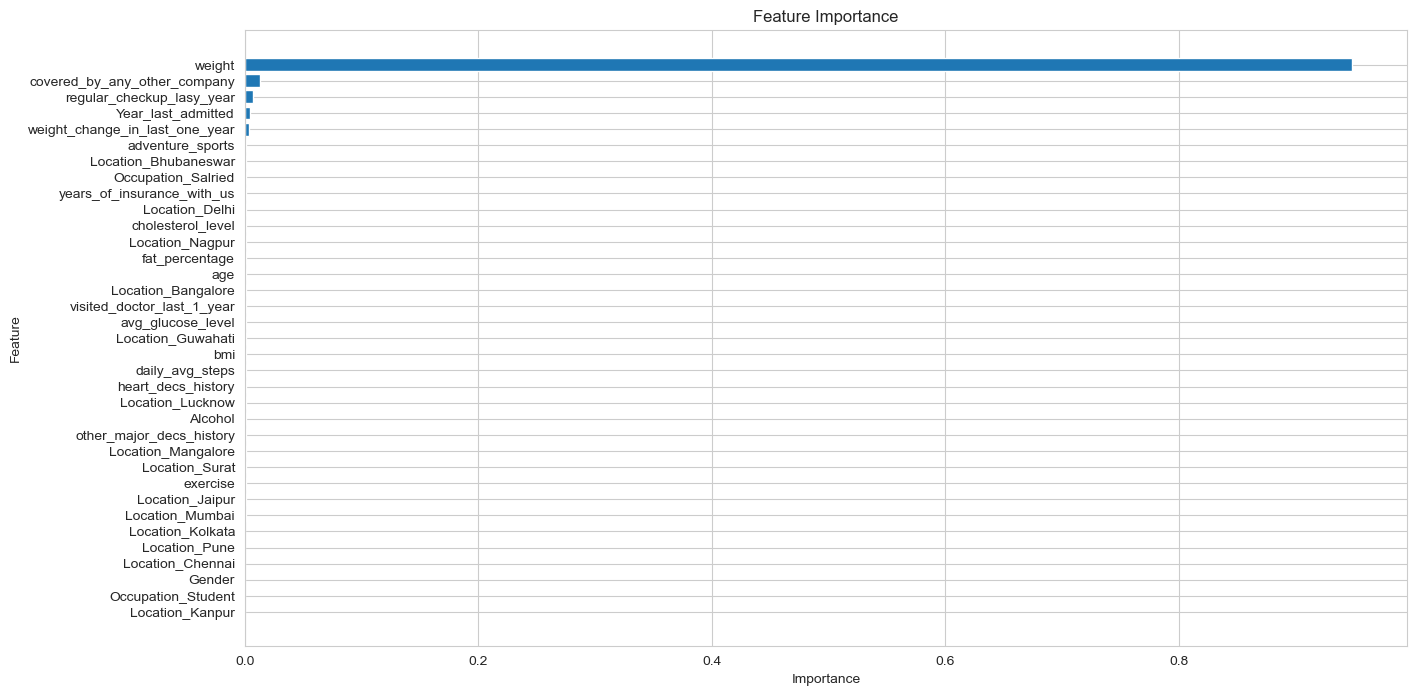

In [223]:
# Plot feature importance
plt.figure(figsize=(15, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [224]:
# fi = feature_importance_df.sort_values(by='Importance', ascending=False)
# fi.to_excel('XGB_feature_importance.xlsx')
# fi

In [225]:
y_pred_rounded = [round(val) for val in y_test_pred_best]
act_pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rounded})

act_pred_df = act_pred_df.reset_index(drop=True)

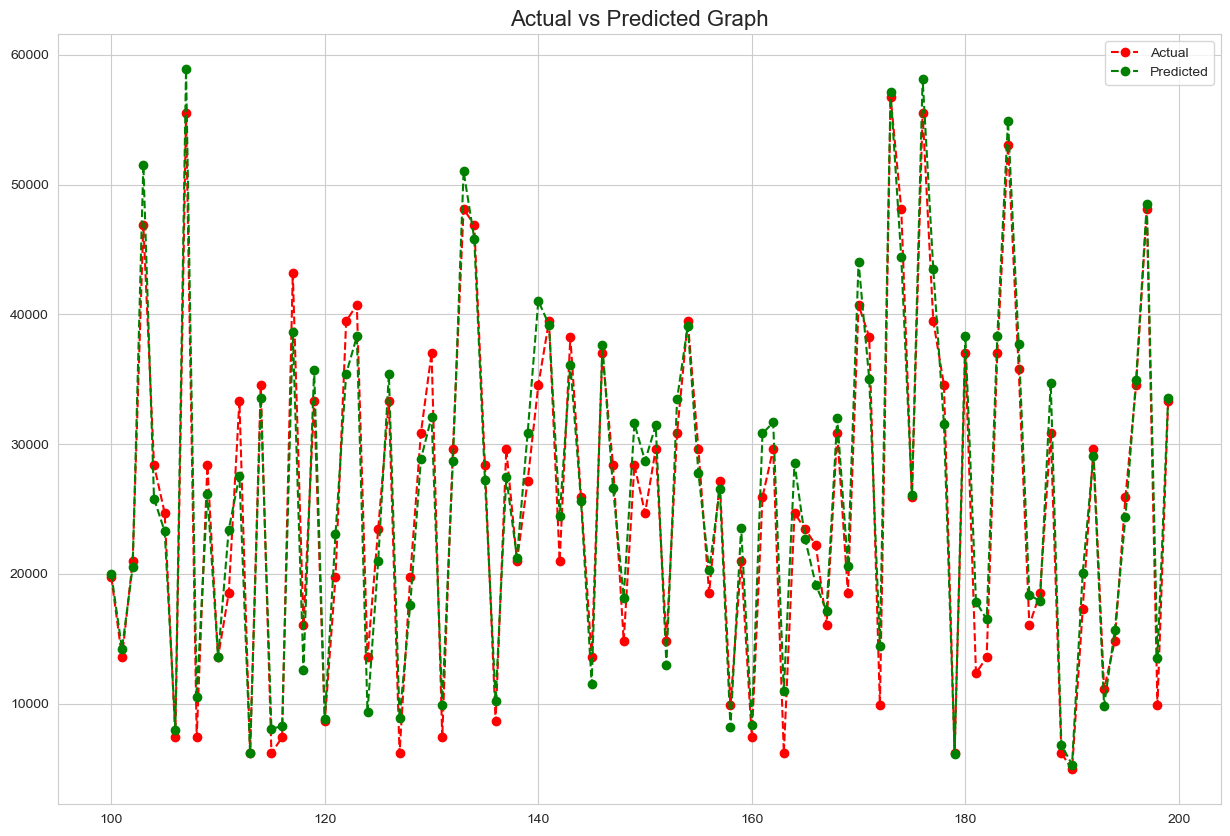

In [226]:
plt.figure(figsize=(15,10))
plt.plot(act_pred_df['Actual'][100:200], "c--o", label = "Actual ", c='Red')
plt.plot(act_pred_df['Predicted'][100:200], "m--o", label = "Predicted", c='green')
plt.title("Actual vs Predicted Graph", fontsize=16)
plt.legend()
plt.show()

# Catboost Regressor

In [227]:
# Identify categorical features (assuming all non-numeric columns are categorical)
# categorical_features_indices = np.where(X_train.dtypes != np.float)[0]

# Create and train the CatBoost Regressor
catboost_regressor = CatBoostRegressor(random_seed=42, verbose=100)
catboost_regressor.fit(X_train, y_train)

Learning rate set to 0.06506
0:	learn: 13501.3743713	total: 173ms	remaining: 2m 52s
100:	learn: 2981.8724794	total: 1.2s	remaining: 10.6s
200:	learn: 2915.5373681	total: 2.13s	remaining: 8.49s
300:	learn: 2853.0137075	total: 3.14s	remaining: 7.3s
400:	learn: 2797.3277516	total: 4.05s	remaining: 6.06s
500:	learn: 2747.3618123	total: 4.97s	remaining: 4.95s
600:	learn: 2696.3629263	total: 5.86s	remaining: 3.89s
700:	learn: 2648.9994846	total: 6.78s	remaining: 2.89s
800:	learn: 2604.9244937	total: 7.73s	remaining: 1.92s
900:	learn: 2565.1049959	total: 8.67s	remaining: 953ms
999:	learn: 2526.5557784	total: 9.68s	remaining: 0us


In [228]:
# Make predictions
y_train_pred = catboost_regressor.predict(X_train)

## Training

In [229]:
# Evaluate the model on training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

print(f'Training R^2 Score: {r2_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training MAPE: {mape_train}')

Training R^2 Score: 0.9689662672662773
Training RMSE: 2526.555778384048
Training MAPE: 0.09899738221689755


# Testing

In [230]:
y_test_pred = catboost_regressor.predict(X_test)

# Evaluate the model on testing data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Testing R^2 Score: {r2_test}')
print(f'Testing RMSE: {rmse_test}')
print(f'Testing MAPE: {mape_test}')

Testing R^2 Score: 0.9539121641295778
Testing RMSE: 3062.7999973057135
Testing MAPE: 0.12050142178372866


## Hyper-tuning Parameters

In [231]:
# Define the parameter grid
param_grid = {
    'iterations': [500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

### Uncomment this to train using hyper parameter tuning and identifying best parameters

In [232]:
# catboost_regressor = CatBoostRegressor(random_seed=42)

# # Perform GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(estimator=catboost_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

In [233]:
best_model = CatBoostRegressor(random_seed=42, depth= 6, iterations= 1000, l2_leaf_reg= 3, learning_rate= 0.01)
best_model.fit(X_train, y_train)

0:	learn: 14212.4962132	total: 8.61ms	remaining: 8.6s
1:	learn: 14085.9350213	total: 17.8ms	remaining: 8.88s
2:	learn: 13964.3435608	total: 27.2ms	remaining: 9.05s
3:	learn: 13837.0035371	total: 35.7ms	remaining: 8.88s
4:	learn: 13713.9345503	total: 43.9ms	remaining: 8.74s
5:	learn: 13591.2519205	total: 54.2ms	remaining: 8.98s
6:	learn: 13469.5731565	total: 62.9ms	remaining: 8.92s
7:	learn: 13349.7352656	total: 72.9ms	remaining: 9.04s
8:	learn: 13232.0369024	total: 81ms	remaining: 8.91s
9:	learn: 13112.7249045	total: 90ms	remaining: 8.91s
10:	learn: 12995.8018097	total: 99.2ms	remaining: 8.91s
11:	learn: 12880.2122734	total: 107ms	remaining: 8.79s
12:	learn: 12766.0939234	total: 115ms	remaining: 8.75s
13:	learn: 12650.4339265	total: 125ms	remaining: 8.78s
14:	learn: 12536.0575400	total: 134ms	remaining: 8.82s
15:	learn: 12426.9849597	total: 143ms	remaining: 8.77s
16:	learn: 12315.3803120	total: 153ms	remaining: 8.84s
17:	learn: 12207.0589914	total: 161ms	remaining: 8.8s
18:	learn: 1210

In [234]:
# Make predictions with the best model
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

In [235]:
# Evaluate the best model on training data
r2_train_best = r2_score(y_train, y_train_pred_best)
rmse_train_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
mape_train_best = mean_absolute_percentage_error(y_train, y_train_pred_best)

print(f'Best Training R^2 Score: {r2_train_best}')
print(f'Best Training RMSE: {rmse_train_best}')
print(f'Best Training MAPE: {mape_train_best}')

Best Training R^2 Score: 0.9581120538561986
Best Training RMSE: 2935.326503965216
Best Training MAPE: 0.11457726003272825


In [236]:
# Evaluate the best model on testing data
r2_test_best = r2_score(y_test, y_test_pred_best)
rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
mape_test_best = mean_absolute_percentage_error(y_test, y_test_pred_best)

print(f'Best Testing R^2 Score: {r2_test_best}')
print(f'Best Testing RMSE: {rmse_test_best}')
print(f'Best Testing MAPE: {mape_test_best}')
# print(f'Best Parameters: {best_params}')

Best Testing R^2 Score: 0.9551165699478251
Best Testing RMSE: 3022.515242536153
Best Testing MAPE: 0.12005677017005605


In [237]:
# Feature Importance
feature_importance = best_model.get_feature_importance(Pool(X_train, label=y_train))
feature_names = X_train.columns

In [238]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

In [239]:
 # Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

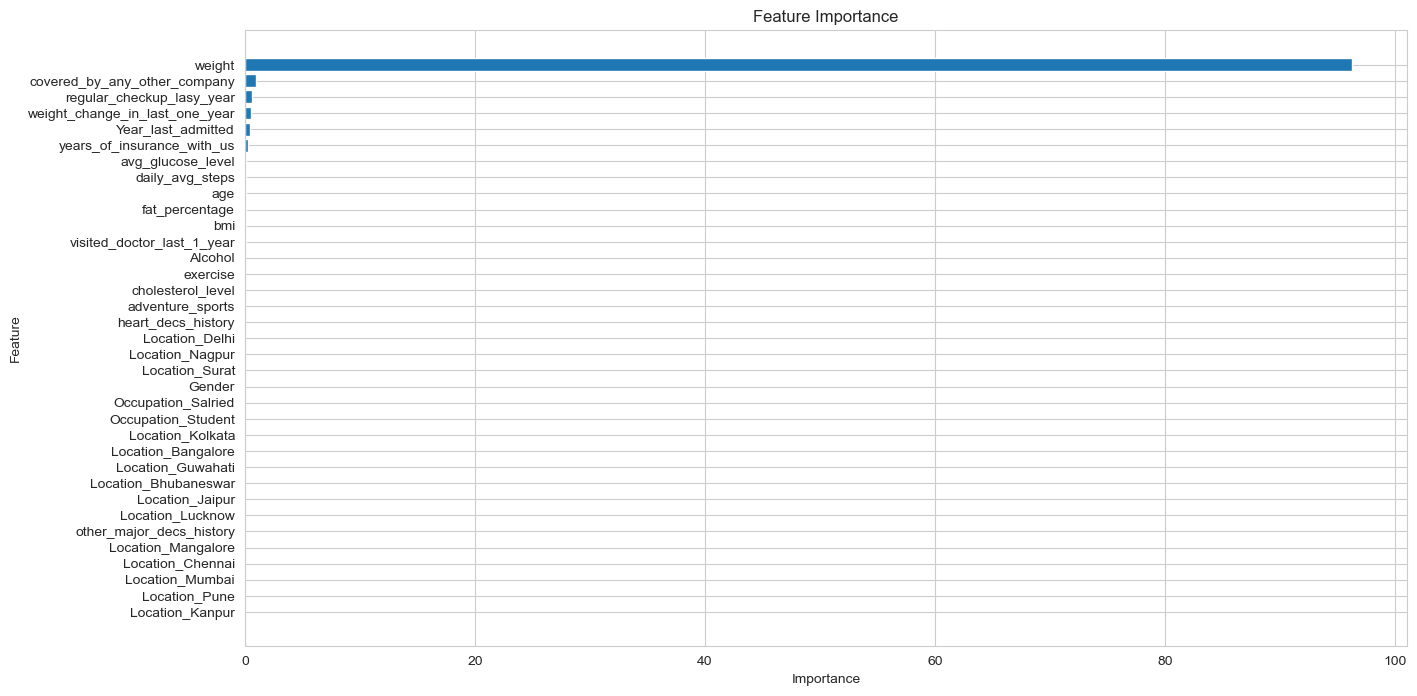

In [240]:
# Plot feature importance
plt.figure(figsize=(15, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [241]:
# fi = feature_importance_df.sort_values(by='Importance', ascending=False)
# # fi.to_excel('catboost_feature_importance.xlsx')
# fi

In [242]:
y_pred_rounded = [round(val) for val in y_test_pred_best]
act_pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rounded})

In [243]:
act_pred_df = act_pred_df.reset_index(drop=True)

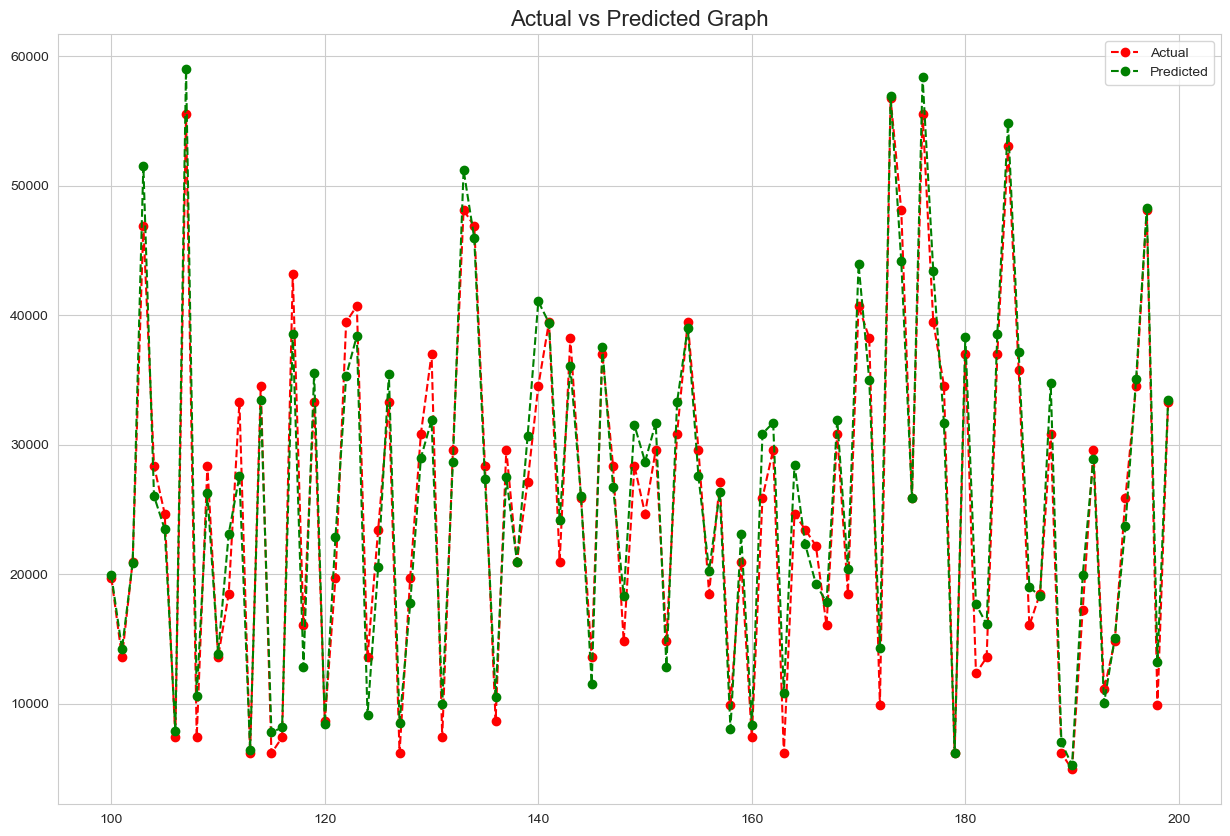

In [244]:
plt.figure(figsize=(15,10))
plt.plot(act_pred_df['Actual'][100:200], "c--o", label = "Actual ", c='Red')
plt.plot(act_pred_df['Predicted'][100:200], "m--o", label = "Predicted", c='green')
plt.title("Actual vs Predicted Graph", fontsize=16)
plt.legend()
plt.show()